# **PROYECTO: DATA SCIENCE LEONARD QUIAME 2023-2**

In [ ]:
# @title ## **CARGA DE LIBRERIAS.**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import chi2_contingency
!pip install scikit-learn imbalanced-learn
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
!pip install requests
!pip install pandas
!pip install lxml
%matplotlib inline

In [ ]:
# @title AbandonoEmpleados-Archivo de datos Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/AbandonoEmpleados.csv'
df = pd.read_csv(file_path, delimiter=';')


## **ABANDONO LABORAL.**

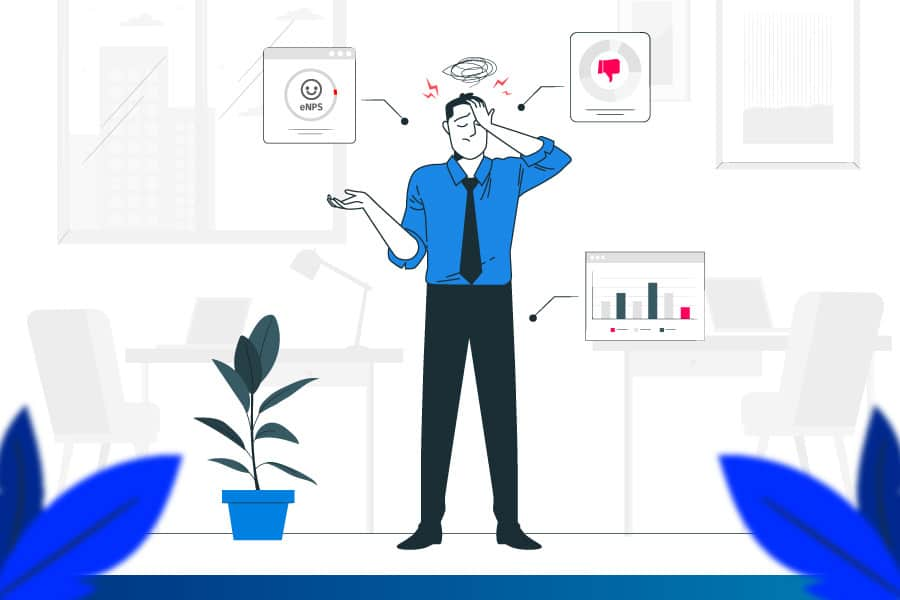

## **ABSTRACT.**

En esta presentación, exploraremos el desafío del abandono laboral en la organizacion o empresa. Se tilizara herramientas de visualización en Python para analizar y comprender por qué algunos empleados deciden abandonar sus trabajos, mientras otros permanecen comprometidos. A través de gráficos como histogramas y gráficos de barras, identificaremos tendencias y relaciones clave, como la satisfacción laboral y la formación de los empleados.

El objetivo es proporcionar información útil para la toma de decisiones en recursos humanos y mejorar la retención de empleados.

¡Acompáñanos en este emocionante viaje de análisis de datos y visualizaciones para desentrañar los secretos del abandono laboral y promover el éxito organizacional!

## **CONTEXTO COMERCIAL.**

Se centra en el desafío del abandono laboral que enfrentan las organizaciones para explorar las razones detrás de las decisiones de los empleados de quedarse o abandonar sus trabajos y cómo esto impacta en el éxito empresarial.

El análisis utiliza herramientas de visualización para comprender mejor el comportamiento de los empleados. Este contexto comercial proporciona una visión general del problema y establece la importancia de abordarlo desde una perspectiva de análisis de datos y visualización para tomar decisiones estratégicas y mejorar la retención de empleados.

## **PROBLEMA COMERCIAL.**

Se centra en abordar el problema comercial de alta tasa de abandono laboral en una empresa. El objetivo es utilizar análisis de datos y visualización para comprender por qué algunos empleados deciden irse, mientras que otros permanecen comprometidos.

Se explorarán variables clave como la satisfacción con los compañeros y la antigüedad en la empresa para identificar relaciones y tendencias. La meta es tomar decisiones estratégicas para mejorar la retención de empleados y, en última instancia, el bienestar laboral en la organización.



## **CONTEXTO ANALÍTICO.**

es utilizar estos hallazgos para tomar decisiones estratégicas que aumenten la retención de empleados. A través del uso de herramientas analíticas, se espera que el proyecto arroje luz sobre cómo factores internos, como la satisfacción laboral y las oportunidades de desarrollo, impactan la rotación del personal.

Este enfoque analítico ayudará a la empresa a comprender mejor su fuerza laboral, a tomar decisiones informadas en el departamento de recursos humanos y a mejorar el ambiente laboral en general.

## **OBJETIVOS.**

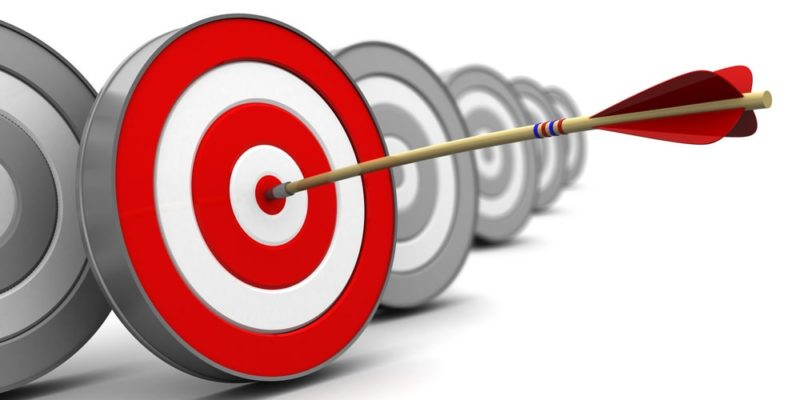

El gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa.

Para ello durante esta semana vas a trabajar en 3 grandes cosas:

- Entender y cuantificar el problema desde el punto de vista de negocio.

- Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga.

- Comunicar los resultados de forma exitosa a la dirección.

## **PREGUNTAS/HIPÓTESIS QUE QUEREMOS RESOLVER MEDIANTE EL ANÁLISIS DE DATOS.**

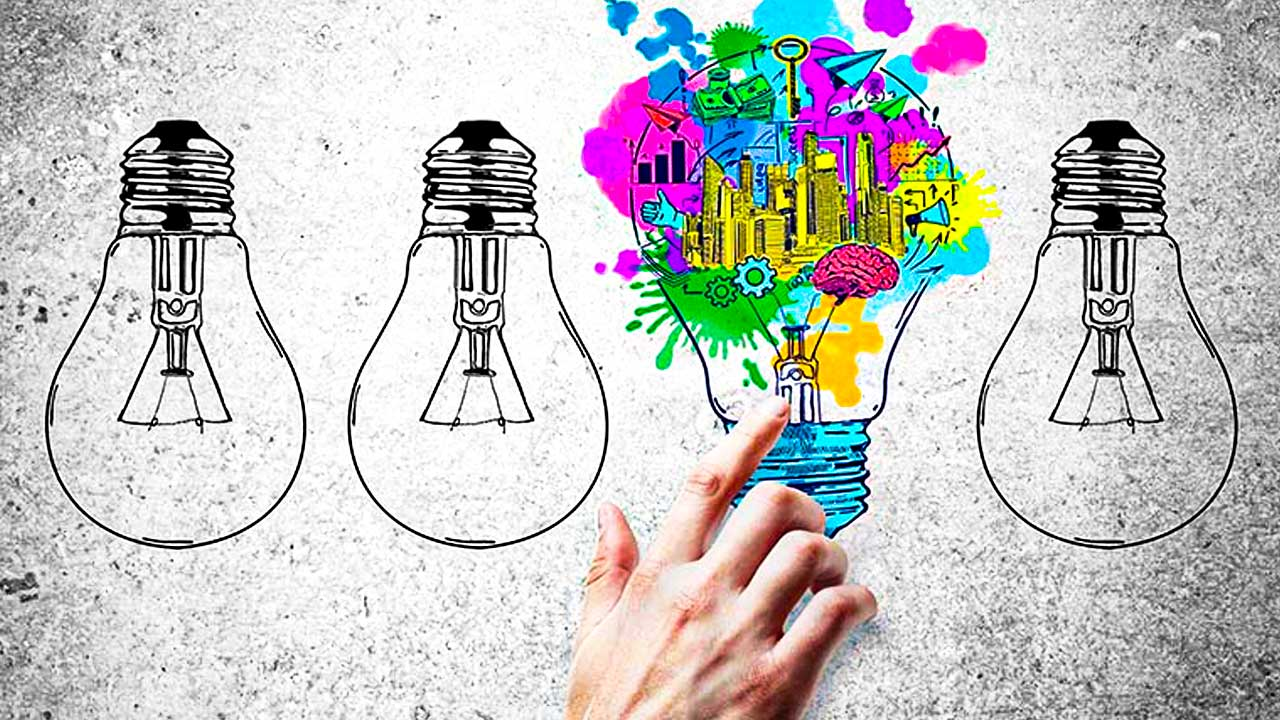

## **Satisfacción Laboral y Abandono.**

Se hipotetiza que la mayoría de los empleados experimenta una alta satisfacción con sus compañeros de trabajo, lo que podría estar asociado a una menor tasa de abandono laboral.

## **Relación entre Acciones y Satisfacción.**

Existe la hipótesis de que los empleados con un mayor nivel de acciones experimentan una mayor satisfacción con sus compañeros, lo que potencialmente influye en su decisión de permanecer en la empresa.

## **Experiencia Laboral.**

La mayoría de los empleados puede tener una experiencia laboral relativamente corta, lo que podría contribuir a una mayor rotación de empleados.

## **Formación y Retención.**

Se plantea que la cantidad de formaciones recibidas en el último año está correlacionada con una menor propensión al abandono laboral. Los empleados que reciben más formaciones podrían estar más satisfechos y comprometidos.

## **Influencia de Departamentos y Puestos.**

Algunos departamentos o puestos específicos pueden presentar tasas de rotación más altas debido a factores relacionados con las tareas o el entorno laboral.

## **Satisfacción y Antigüedad.**

Los empleados con mayor antigüedad en la empresa pueden experimentar una mayor satisfacción laboral debido a su familiaridad con la organización.

Estas hipótesis iniciales proporcionan una base sólida para el análisis de datos. Es fundamental recordar que el análisis exploratorio de datos puede validar, refutar o revelar nuevas relaciones, lo que puede llevar a la formulación de preguntas adicionales y refinamiento de las hipótesis a medida que avanzamos en la investigación.

___

##**CARGA DE LOS DATOS.**

In [ ]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


**Datos para Notebook del archivo: AbandonoEmpleados.csv**

___

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

**Informacion de Dataset: AbandonoEmpleados.csv**

___

###**ANÁLISIS DE NULOS.**

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

## **Conclusiones.**

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA

In [ ]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


___

## **ANÁLISIS EXPLORATORIO DE DATOS.**

In [ ]:
# @title **EDA**
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

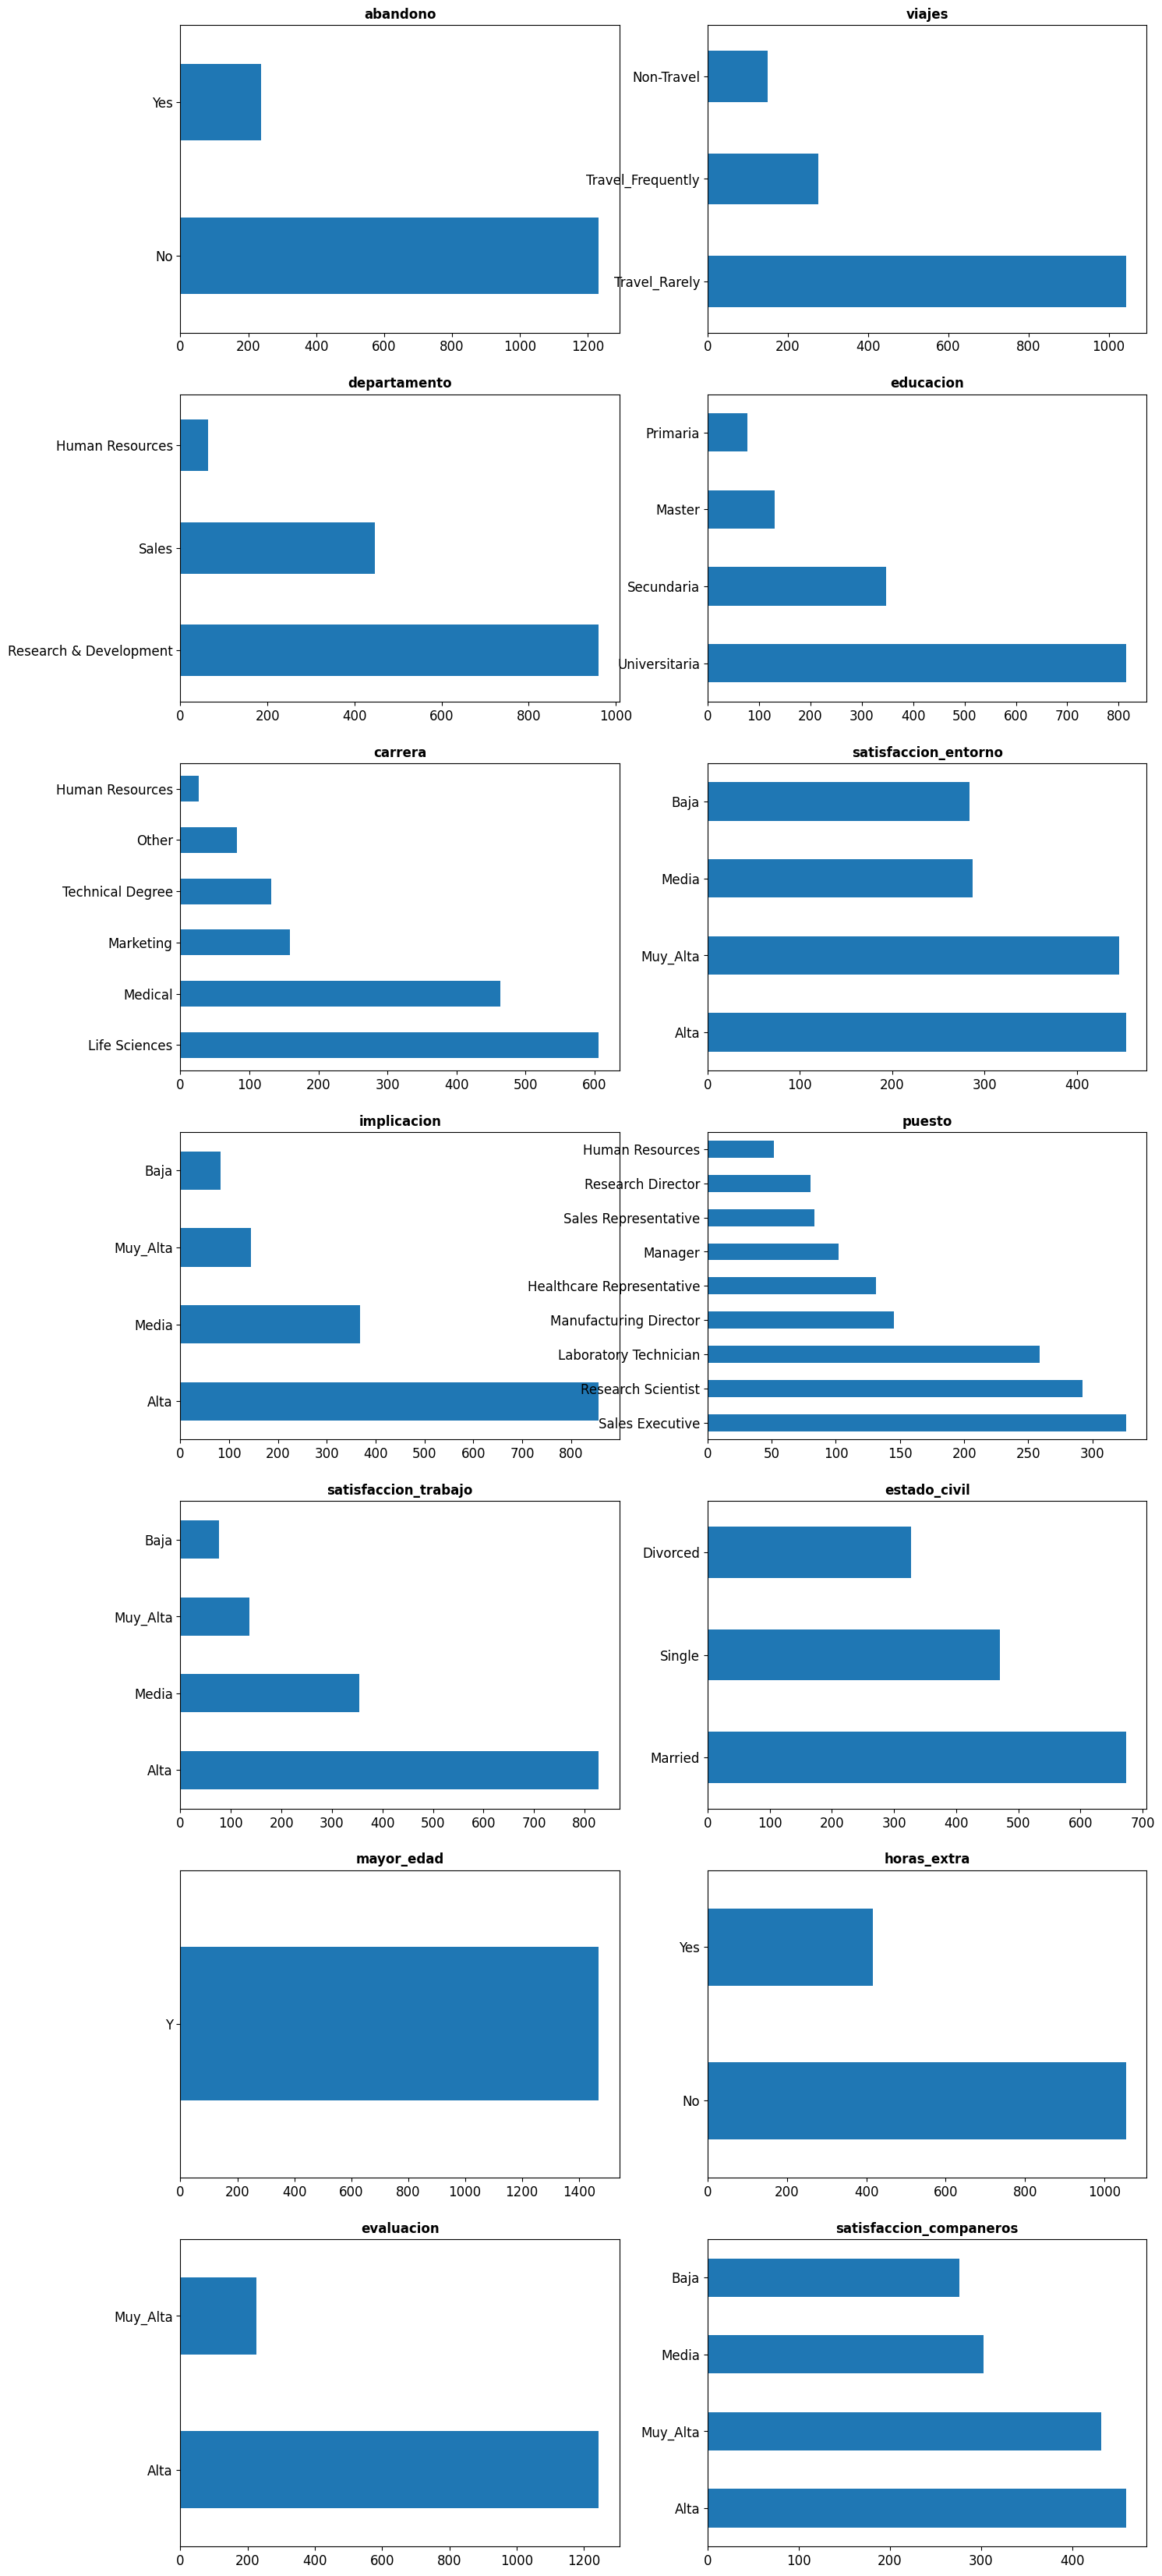

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

## **Conclusiones.**

mayor_edad solo tiene un valor --> eliminarla
Sobre las imputaciones pendientes de variables categóricas:
educacion: imputar por 'Universitaria'
satisfaccion_trabajo: imputar por 'Alta'
implicacion: imputar por 'Alta'

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

## **EDA VARIABLES NUMÉRICAS.**

In [ ]:
# @title **Variables.**
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


# **Conclusiones.**

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada.


In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


**Limpia el DataFrame de las columnas 'empleados', 'sexo' y 'horas_quincena' de tu DataFrame y modifica el DataFrame en su lugar.**

___

## **GENERACIÓN DE INSIGHTS.**

# **Cuantificación del problema: ¿Cual es la tasa de abandono?**
---

In [ ]:
df.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

Muestra la distribución de las clases en la columna 'abandono' en tu DataFrame. Aquí tienes algunas notas y conclusiones basadas en esta distribución:

* Desbalanceo de Clases: Existe un desequilibrio en las clases de la variable objetivo 'abandono'. Aproximadamente el 84% de los empleados se encuentran en la clase 'No', mientras que solo alrededor del 16% están en la clase 'Yes'.

* Desafío en la Predicción de la Clase 'Yes': Debido al desequilibrio, los modelos de aprendizaje automático pueden tener dificultades para predecir con precisión la clase 'Yes'. Esto se debe a que los modelos tienden a predecir la clase mayoritaria ('No') con mayor frecuencia.

---

# **¿Hay un perfil tipo de empleado que deja la empresa?**
---

In [ ]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

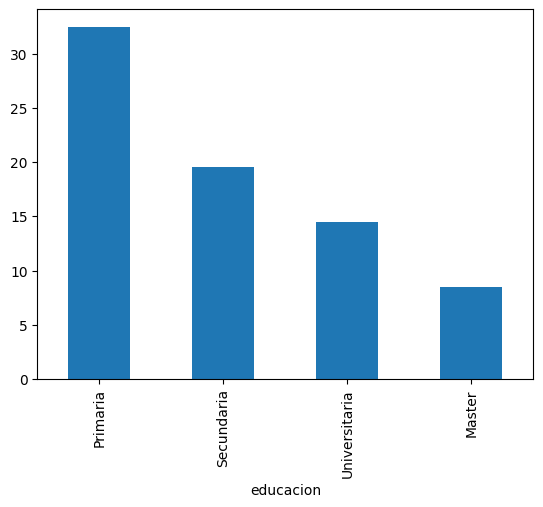

In [ ]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**Grafico de Educaciòn: Domina la Primaria.**

___

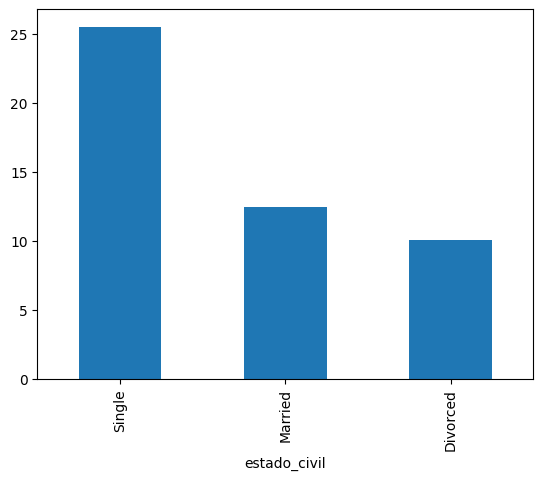

In [ ]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**Grafico de estado civil: Domina single (Soltero).**

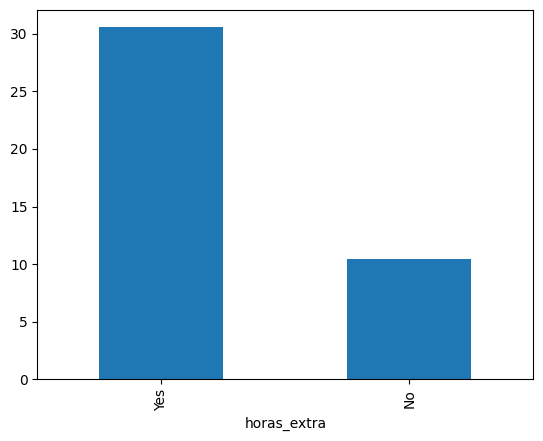

In [ ]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**Grafico de horas extra: agrupa tus datos por la columna 'horas_extra' y calcula el valor promedio de la columna 'abandono' para cada categoría de 'horas_extra'. Esto te dará la tasa promedio de abandono para cada categoría de horas extras.**

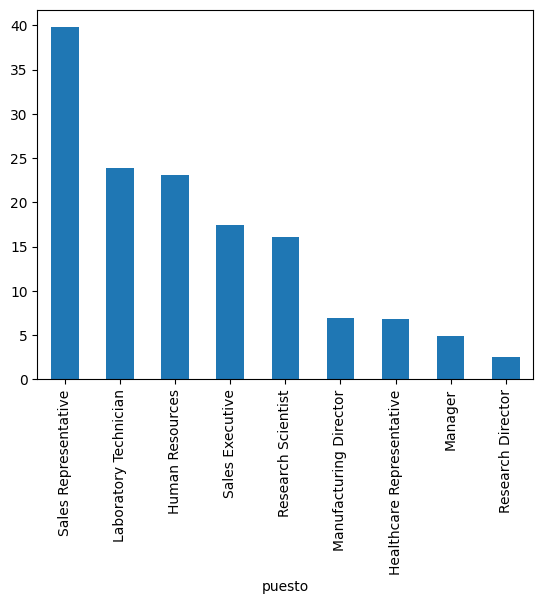

In [ ]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

**Grafico Analisis por puesto: Calcula la tasa de abandono promedio para diferentes categorías de la variable 'puesto' y crea un gráfico de barras para visualizar esta información. se ordenan en orden descendente para que puedas ver los puestos con las tasas de abandono más altas en la parte superior. Además, se multiplica por 100 para expresar las tasas como porcentajes.**

___

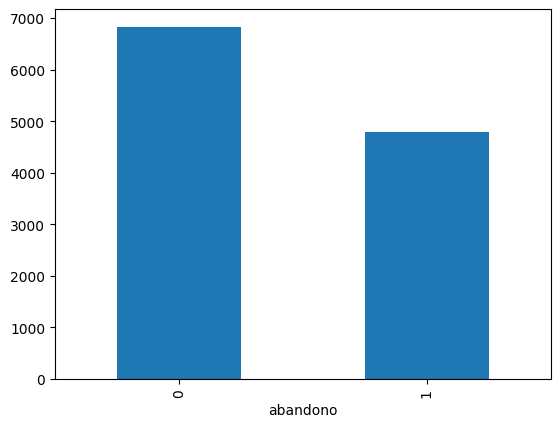

In [ ]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

 **Grafico de Abandono: Se realiza un análisis del salario promedio en función de la variable 'abandono' y crea un gráfico de barras para visualizar la diferencia en los salarios promedio entre las dos categorías de 'abandono' ('Yes' y 'No').**

---

# **Conclusiones.**

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---

In [ ]:
# @title ## **Pagina de Informacion Notebook**
from IPython.display import HTML

# URL de estudio
web_url = "https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/"

# Widget HTML para mostrar la página web
html_widget = HTML(f'<iframe src="{web_url}" width="800" height="600"></iframe>')

# Página web
html_widget

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning:

Consider using IPython.display.IFrame instead



### **¿Cual es el impacto económico de este problema?**

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario.

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario.

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario.

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario.

In [ ]:
from IPython.display import Image

# imagen referencia en estudio
url_imagen = "http://americanprogress.org/wp-content/uploads/sites/2/2012/11/CostofTurnover_fig2web.png"

# Muestra
Image(url=url_imagen)

In [ ]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


---

In [ ]:
# @title **Calculamos el impacto económico de cada empleado si deja la empresa.**
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---

### **¿Cúanto nos ha costado este problema en el último año?**

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

**Coste del problema en el último año para la organizaciòn: 2719005.912**

___

### **¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)**

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

**Coste de empleados no estén motivados para la organizaciòn: 368672.688**

In [ ]:
# @title ### **¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?**
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


### **Y podemos seguir trazando estrategias asociadas a los insights de abandono:**

Habíamos visto que los representantes de ventas son el puesto que más se van.

¿Tendría sentido hacer un plan específico para ellos?

¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado.

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

In [ ]:
# @title ### **Ahora vamos a estimar cuántos se podran ir este año**
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

In [ ]:
# @title ### **Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer.**
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada.

# **Informaciòn adiconal al Insights.**

In [ ]:
resumen_salarios = df.groupby('departamento')['salario_mes'].sum()

In [ ]:
print(resumen_salarios)

departamento
Human Resources            419234
Research & Development    6036284
Sales                     3103791
Name: salario_mes, dtype: int64


In [ ]:
import plotly.express as px

# Supongamos que deseas crear un gráfico de barras con las edades y salarios promedio
fig = px.bar(data_frame=df, x='edad', y='salario_mes', title='Gráfico de Barras Edad vs. Salario Promedio')

fig.show()

 Gráfico de barras: Compara la edad de los empleados con sus salarios promedio permitirá visualizar la relación entre la edad de los empleados y sus salarios promedio.

___

In [ ]:
fig = px.scatter(df, x='edad', y='salario_mes', title='Gráfico de Dispersión: Edad vs Salario')
fig.show()

Gráfico de dispersión: compara la edad de los empleados con sus salarios mensuales permite visualizar la relación entre la edad de los empleados y sus salarios mensuales.
Cada punto en el gráfico representa un empleado y su posición en el gráfico se determina por su edad y salario mensual.

### **Visualizaciones univariadas y bivariadas Visualizaciones: Histograma de satisfaccion_companeros.**

In [ ]:
print(df.columns)

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual',
       'salario_ano', 'impacto_abandono'],
      dtype='object')


In [ ]:
print(df.head())

    edad  abandono             viajes            departamento  distancia_casa  \
id                                                                              
1     41         1      Travel_Rarely                   Sales               1   
2     49         0  Travel_Frequently  Research & Development               8   
4     37         1      Travel_Rarely  Research & Development               2   
5     33         0  Travel_Frequently  Research & Development               3   
7     27         0      Travel_Rarely  Research & Development               2   

        educacion        carrera satisfaccion_entorno implicacion  \
id                                                                  
1   Universitaria  Life Sciences                Media        Alta   
2      Secundaria  Life Sciences                 Alta       Media   
4      Secundaria          Other             Muy_Alta       Media   
5   Universitaria  Life Sciences             Muy_Alta        Alta   
7   Universitaria 

### **Visualización univariable: Histograma de años en la compañía (anos_compania).**

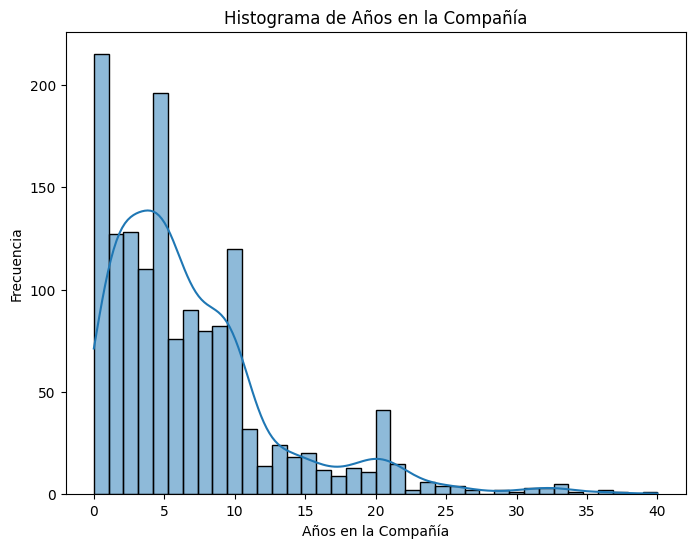

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['anos_compania'], kde=True)
plt.xlabel('Años en la Compañía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años en la Compañía')
plt.show()

Histograma: Permite visualizar la distribución de los años que los empleados han estado en la compañía. Se puede observar la frecuencia de empleados en varios rangos de años y determinar si hay una concentración de empleados en un rango particular o si la distribución es uniforme. También, la superposición de la estimación de la función de densidad kernel proporciona información adicional sobre la forma de la distribución.

### **Visualización univariable: Gráfico de barras de satisfacción con compañeros (satisfaccion_companeros).**

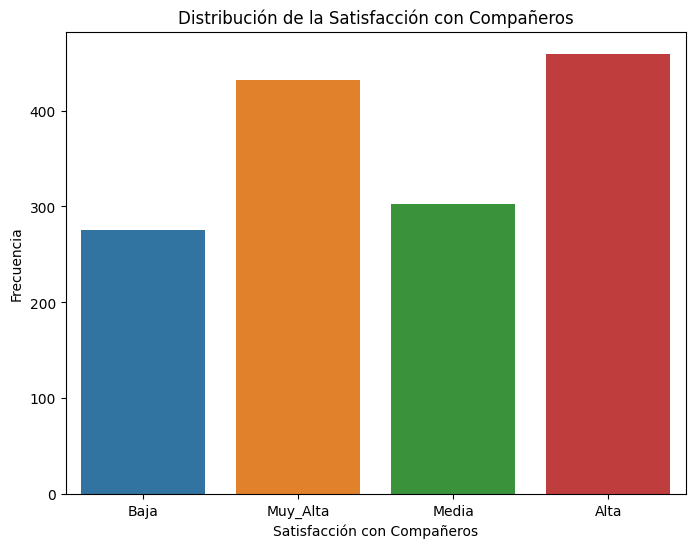

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaccion_companeros', data=df)
plt.xlabel('Satisfacción con Compañeros')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Satisfacción con Compañeros')
plt.show()

Gráfico de conteo: Permite visualizar cómo se distribuye la satisfacción de los empleados con sus compañeros. Cada barra representa una categoría de satisfacción, y la altura de la barra muestra la frecuencia de empleados que pertenecen a esa categoría. Puedes ver claramente cuántos empleados están altamente satisfechos, satisfechos, insatisfechos, etc., con sus compañeros de trabajo. Esto proporciona información sobre el ambiente laboral y cómo los empleados se sienten acerca de sus colegas.

### **Visualización univariable: Gráfico de barras de número de formaciones en el último año (num_formaciones_ult_ano).**

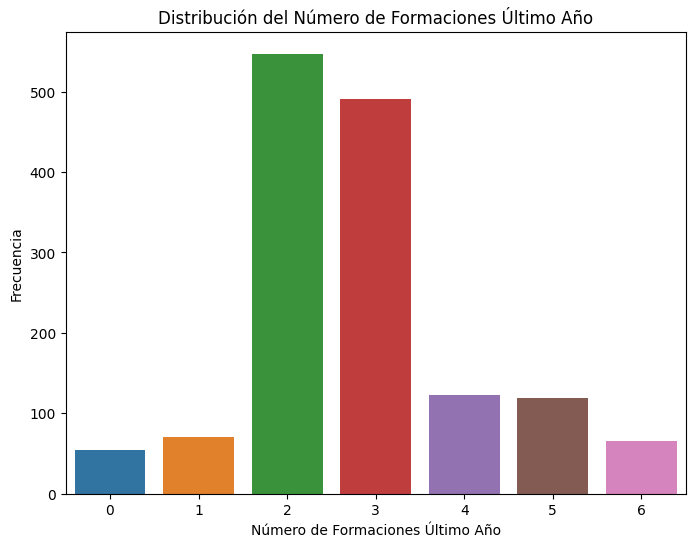

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num_formaciones_ult_ano', data=df)
plt.xlabel('Número de Formaciones Último Año')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Formaciones Último Año')
plt.show()

Gráfico de barras resultante muestra cuántos empleados han realizado diferentes cantidades de formaciones en el último año. Cada barra representa una cantidad de formaciones, y la altura de la barra indica cuántos empleados han realizado esa cantidad de formaciones. Esto proporciona información sobre la inversión en la formación de los empleados y cómo se distribuye en la organización.

___

### **Resumen numérico: Estadísticas descriptivas para años en la compañía (anos_compania).**

In [ ]:
anos_compania_summary = df['anos_compania'].describe()
print(anos_compania_summary)

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: anos_compania, dtype: float64


### **Resumen numérico: Estadísticas descriptivas para satisfacción con compañeros (satisfaccion_companeros).**

In [ ]:
satisfaccion_companeros_summary = df['satisfaccion_companeros'].describe()
print(satisfaccion_companeros_summary)

count     1470
unique       4
top       Alta
freq       459
Name: satisfaccion_companeros, dtype: object


### **Resumen numérico: Estadísticas descriptivas para número de formaciones en el último año (num_formaciones_ult_ano).**

In [ ]:
num_formaciones_summary = df['num_formaciones_ult_ano'].describe()
print(num_formaciones_summary)

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: num_formaciones_ult_ano, dtype: float64


In [ ]:
mapeo_satisfaccion = {
    'Muy_Alta': 5,
    'Alta': 4,
    'Media': 3,
    'Baja': 2,
    'Muy_Baja': 1
}

In [ ]:
df['satisfaccion_companeros'] = df['satisfaccion_companeros'].replace(mapeo_satisfaccion)

In [ ]:
promedio_satisfaccion_abandono = df.groupby('abandono')['satisfaccion_companeros'].mean()
print(promedio_satisfaccion_abandono)

abandono
0    3.733982
1    3.599156
Name: satisfaccion_companeros, dtype: float64


In [ ]:
promedio_satisfaccion_abandono = df.groupby('abandono')['satisfaccion_companeros'].mean()
print(promedio_satisfaccion_abandono)

abandono
0    3.733982
1    3.599156
Name: satisfaccion_companeros, dtype: float64


CORRELACION

<ipython-input-50-aab9b644f767>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



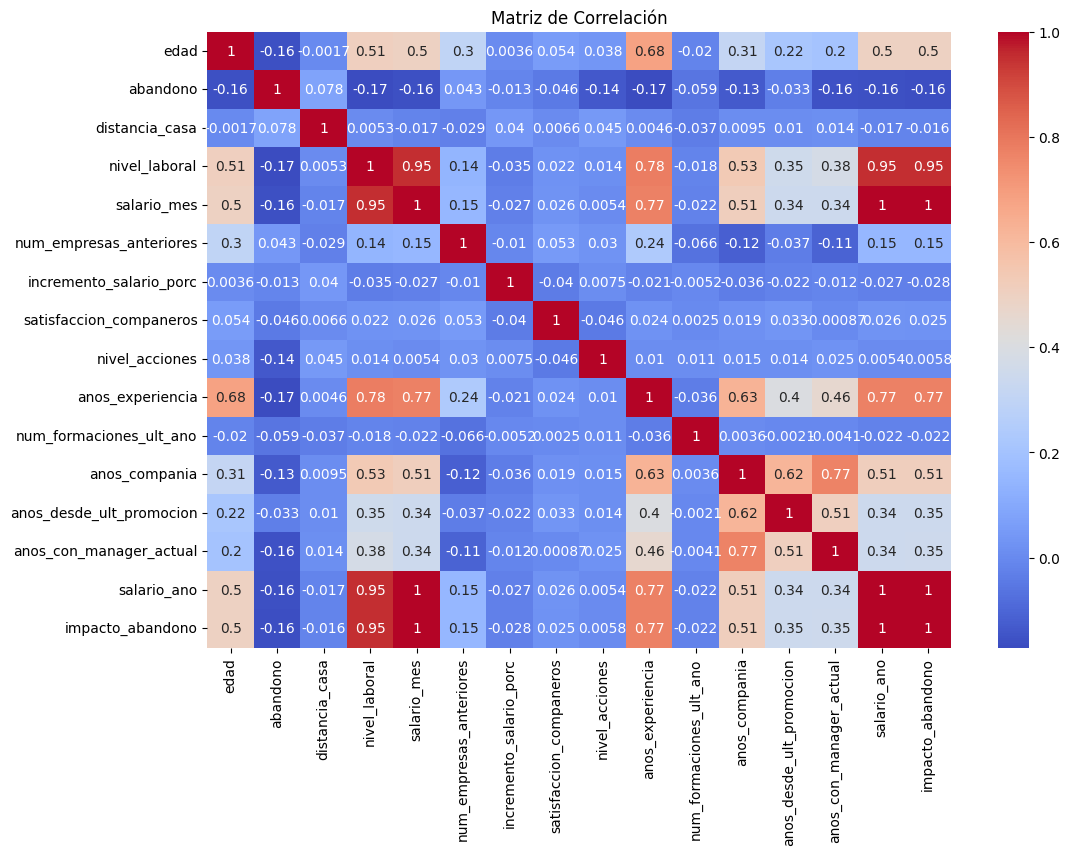

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


El mapa de calor resultante representa visualmente las relaciones de correlación entre las variables numéricas en tu conjunto de datos. Las celdas más oscuras indican una correlación negativa, mientras que las más claras indican una correlación positiva. Esto puede ayudarte a identificar patrones y relaciones entre las variables.

___

# **Visualizaciones y resúmenes numéricos generados recomendaciones basados en los insights observados.**

**1. Satisfacción con los Compañeros de Trabajo:**

Pregunta: ¿Cuál es la distribución de la satisfacción con los compañeros de trabajo entre los empleados?
Hipótesis: La mayoría de los empleados están satisfechos con sus compañeros de trabajo, lo que podría estar relacionado con una menor tasa de abandono laboral.
Análisis Realizado: Visualizaciones Univariable, Bivariable, Resumen Numérico, y Visualización Multivariable.

Hallazgos: Se obtuvo una visión completa de la satisfacción de los empleados con sus compañeros. Si la hipótesis se respalda, podría indicar que un ambiente laboral positivo está relacionado con una menor tasa de abandono.

**2. Relación entre el Nivel de Acciones y la Satisfacción con Compañeros de Trabajo:**

Pregunta: ¿Existe alguna relación entre el nivel de acciones y la satisfacción con los compañeros de trabajo?
Hipótesis: Los empleados con un nivel de acciones más alto podrían tener una mayor satisfacción con sus compañeros, lo que podría influir en su decisión de quedarse en la empresa.
Análisis Realizado: Visualización Bivariable, Multivariable, Resumen Numérico, y Análisis de Correlación.

Hallazgos: Se investigó la relación entre el nivel de acciones y la satisfacción con compañeros. Si la hipótesis se respalda, podría sugerir que un alto nivel de acciones influye en la satisfacción y la retención de empleados.

**3. Años de Experiencia Laboral:**

Pregunta: ¿Cuál es la distribución de años de experiencia laboral de los empleados en la empresa?
Hipótesis: La mayoría de los empleados podrían tener una experiencia laboral relativamente corta, relacionada con una mayor tasa de rotación.
Análisis Realizado: Visualización Univariada, Resumen Numérico, Análisis de Frecuencia, y Análisis Temporal.

Hallazgos: Se examinó la distribución de años de experiencia. Si la hipótesis se respalda, podría indicar una alta rotación debido a la inexperiencia de los empleados.

**4. Formaciones y Propensión al Abandono:**

Pregunta: ¿La cantidad de formaciones recibidas se correlaciona con la propensión al abandono laboral?
Hipótesis: Más formaciones están relacionadas con una menor propensión al abandono laboral.
Análisis Realizado: Visualización Bivariada, Análisis Estadístico, Análisis de Agrupamiento, y Visualización Multivariada.

Hallazgos: Se investigó la relación entre formaciones y abandono. Si la hipótesis se respalda, podría sugerir que invertir en formación puede reducir el abandono.

**5. Influencia del Departamento y Puesto en el Abandono:**

Pregunta: ¿El departamento y el puesto de los empleados influyen en su decisión de abandonar la empresa?
Hipótesis: Algunos departamentos o puestos pueden tener una mayor tasa de rotación debido a factores relacionados con el trabajo o el entorno laboral.
Análisis Realizado: Visualización Bivariada, Análisis Estadístico, Análisis de Agrupamiento, y Visualización Multivariada.

Hallazgos: Se exploró cómo el departamento y el puesto afectan el abandono. Diferencias significativas podrían señalar áreas de mejora en la retención de talento.

**6. Satisfacción y Antigüedad:**

Pregunta: ¿Existe una relación entre la satisfacción laboral y la antigüedad de los empleados en la empresa?
Hipótesis: Empleados con mayor antigüedad tienen mayor satisfacción laboral debido a la familiaridad con la empresa.
Análisis Realizado: Visualización Univariable, Bivariable, Análisis de Correlación, y Estadísticas Descriptivas.

Hallazgos: Se evaluó si la antigüedad se relaciona con la satisfacción. Si se respalda, podría ayudar a comprender cómo la antigüedad influye en la retención y la productividad de los empleados.

Estos análisis y visualizaciones proporcionan información valiosa para la empresa, pero es importante recordar que no establecen relaciones causales definitivas. Estos resultados iniciales pueden guiar investigaciones adicionales y estrategias para mejorar la satisfacción y retención de empleados.

---

## **MODELADO.**
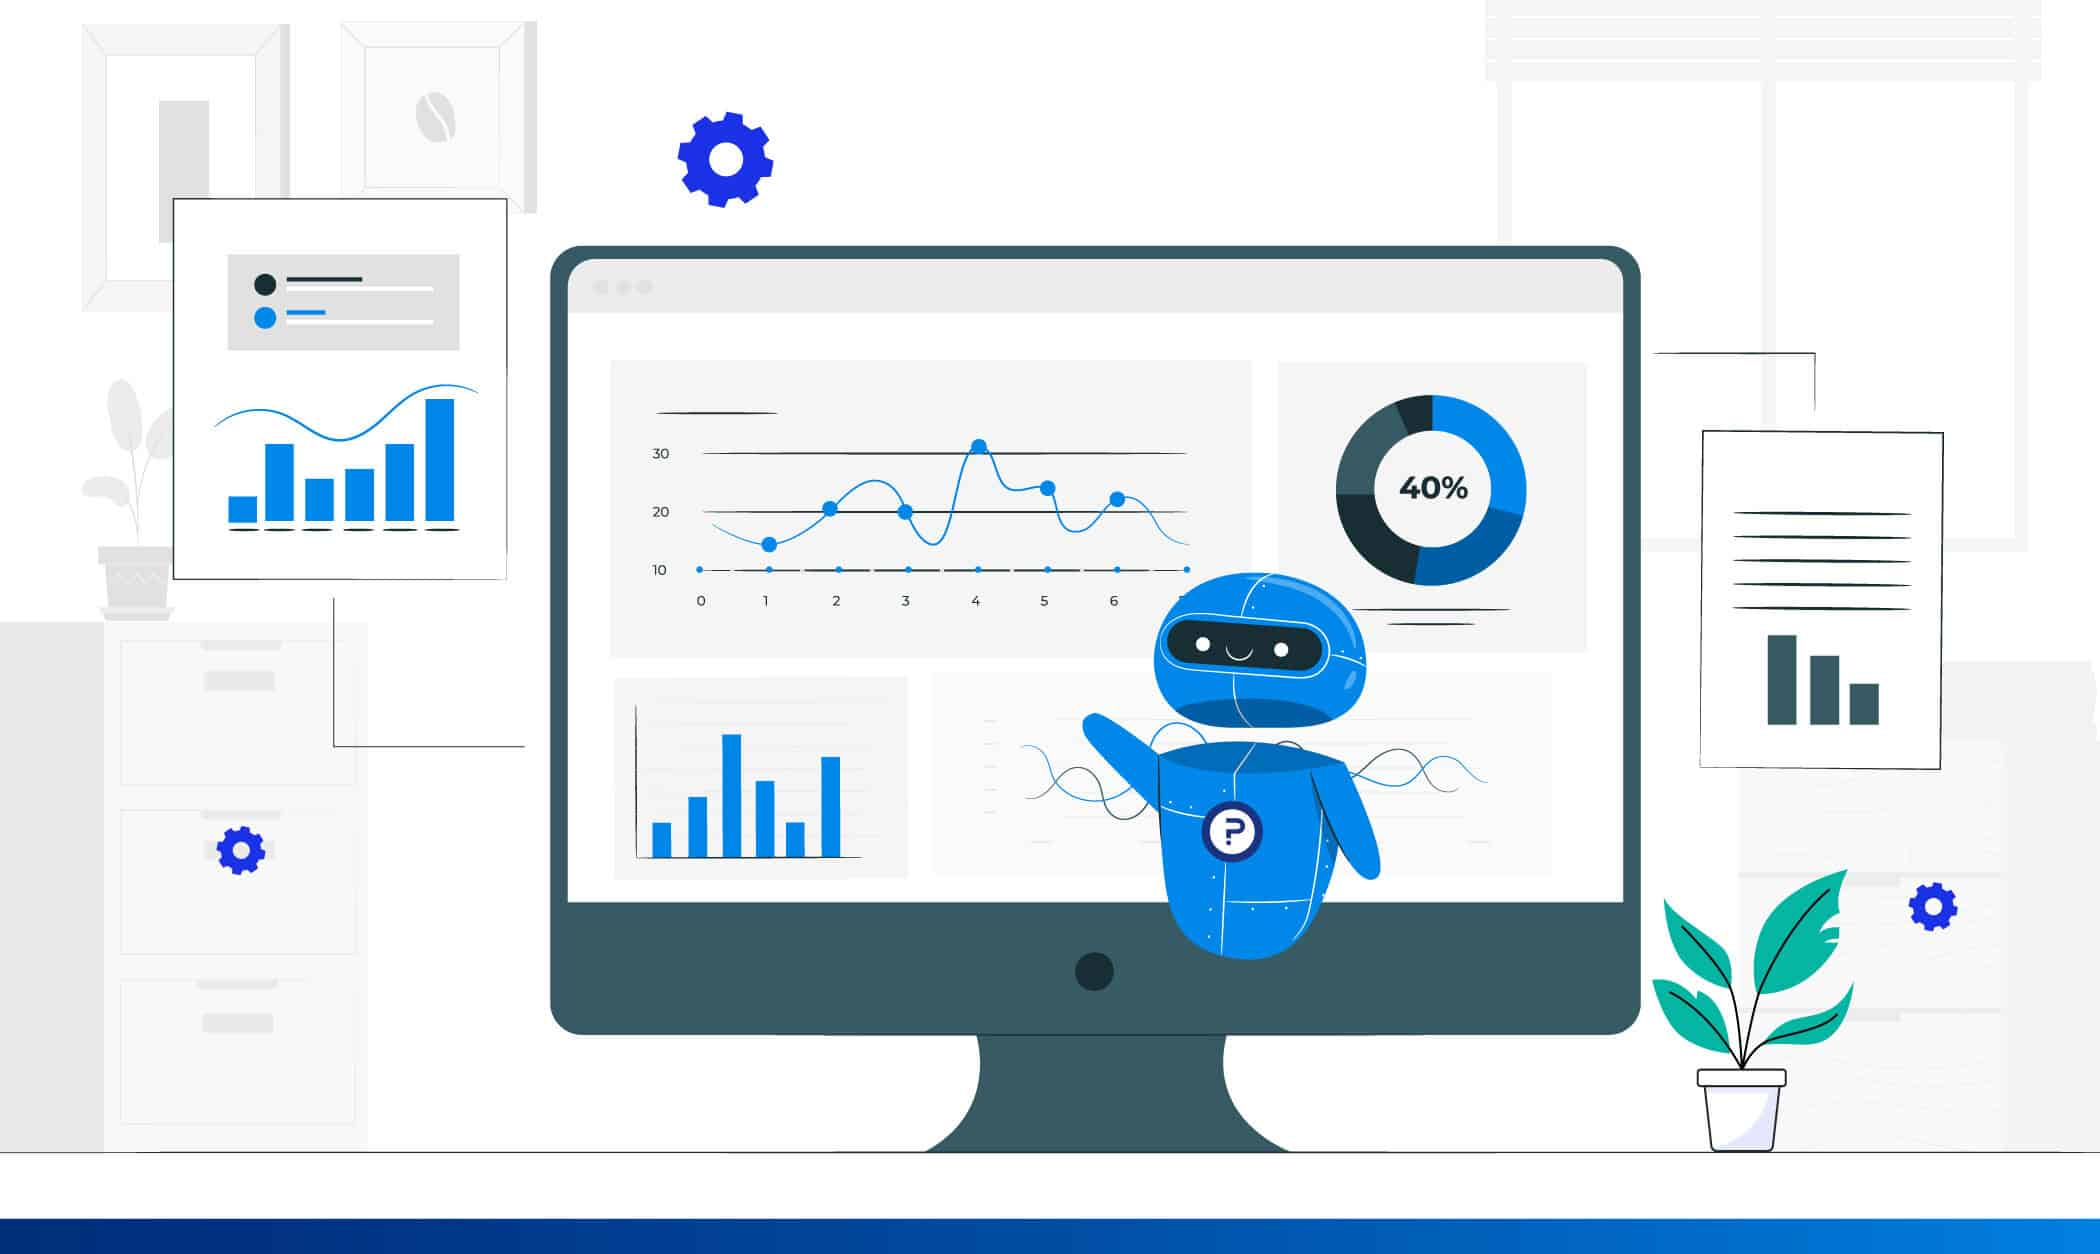

In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### **PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN.**

In [ ]:
# @title #### Transformar todas las variables categóricas a númericas.
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### **Dataframe final.**

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe.

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final.

In [ ]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,incremento_salario_porc,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,11,2,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,23,5,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,15,3,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11,4,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12,5,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17,4,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,15,2,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,20,3,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,14,5,0,17,3,9,0,8,64680,13194.720


### **DISEÑO DE LA MODELIZACIÓN.**

#### **Separación predictoras y target.**

In [ ]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

**Definiciòn de target: Abandono.**

___

#### **Separación train y test.**

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

___

### **ENTRENAMIENTO DEL MODELO SOBRE TRAIN.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### **PREDICCIÓN Y VALIDACIÓN SOBRE TEST.**

In [ ]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.1120332 , 0.10071942, 0.1120332 , 0.04557641, 0.11267606,
       0.04557641, 0.11267606, 0.1120332 , 0.04557641, 0.04557641,
       0.04557641, 0.04557641, 0.1120332 , 0.10071942, 0.04557641,
       0.1120332 , 0.20930233, 0.11267606, 0.04557641, 0.04557641])

In [ ]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6979343103321305

## **INTERPRETACIÓN.**

#### **Diagrama del árbol.**

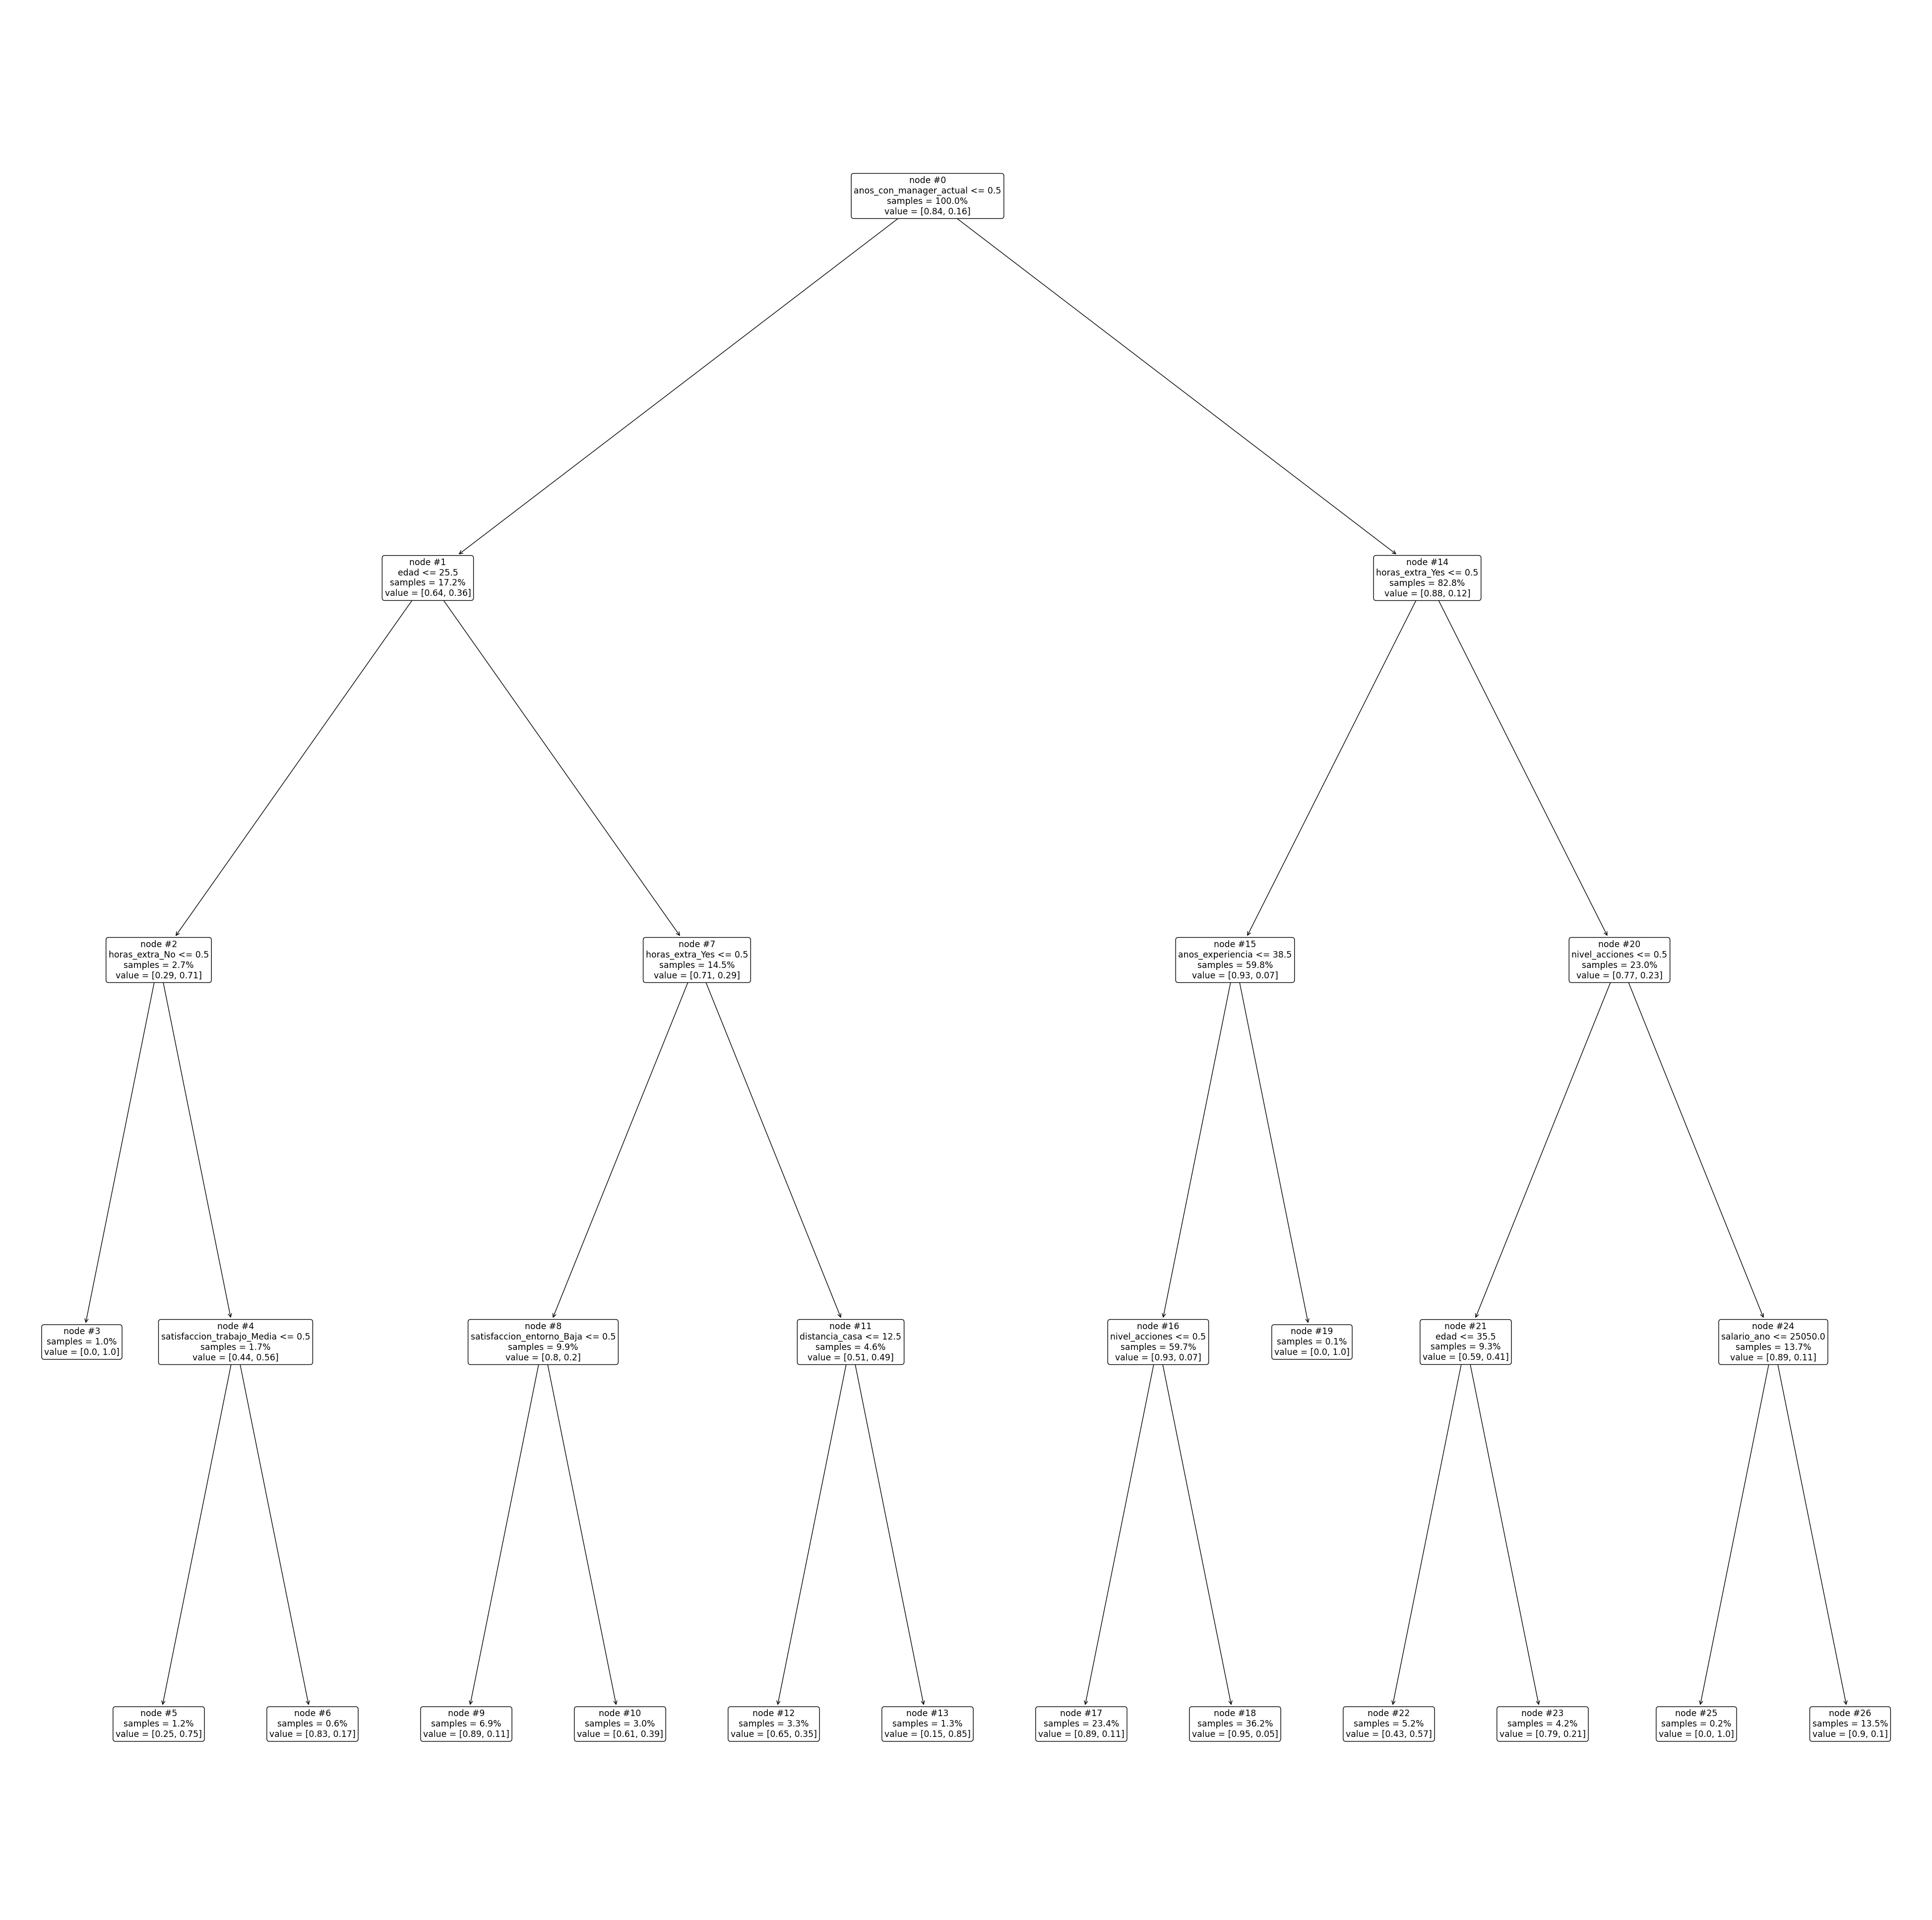

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

**Variables en arbol de decisiones con variable importontates para el estudio.**

___

#### **Importancia de las variables.**

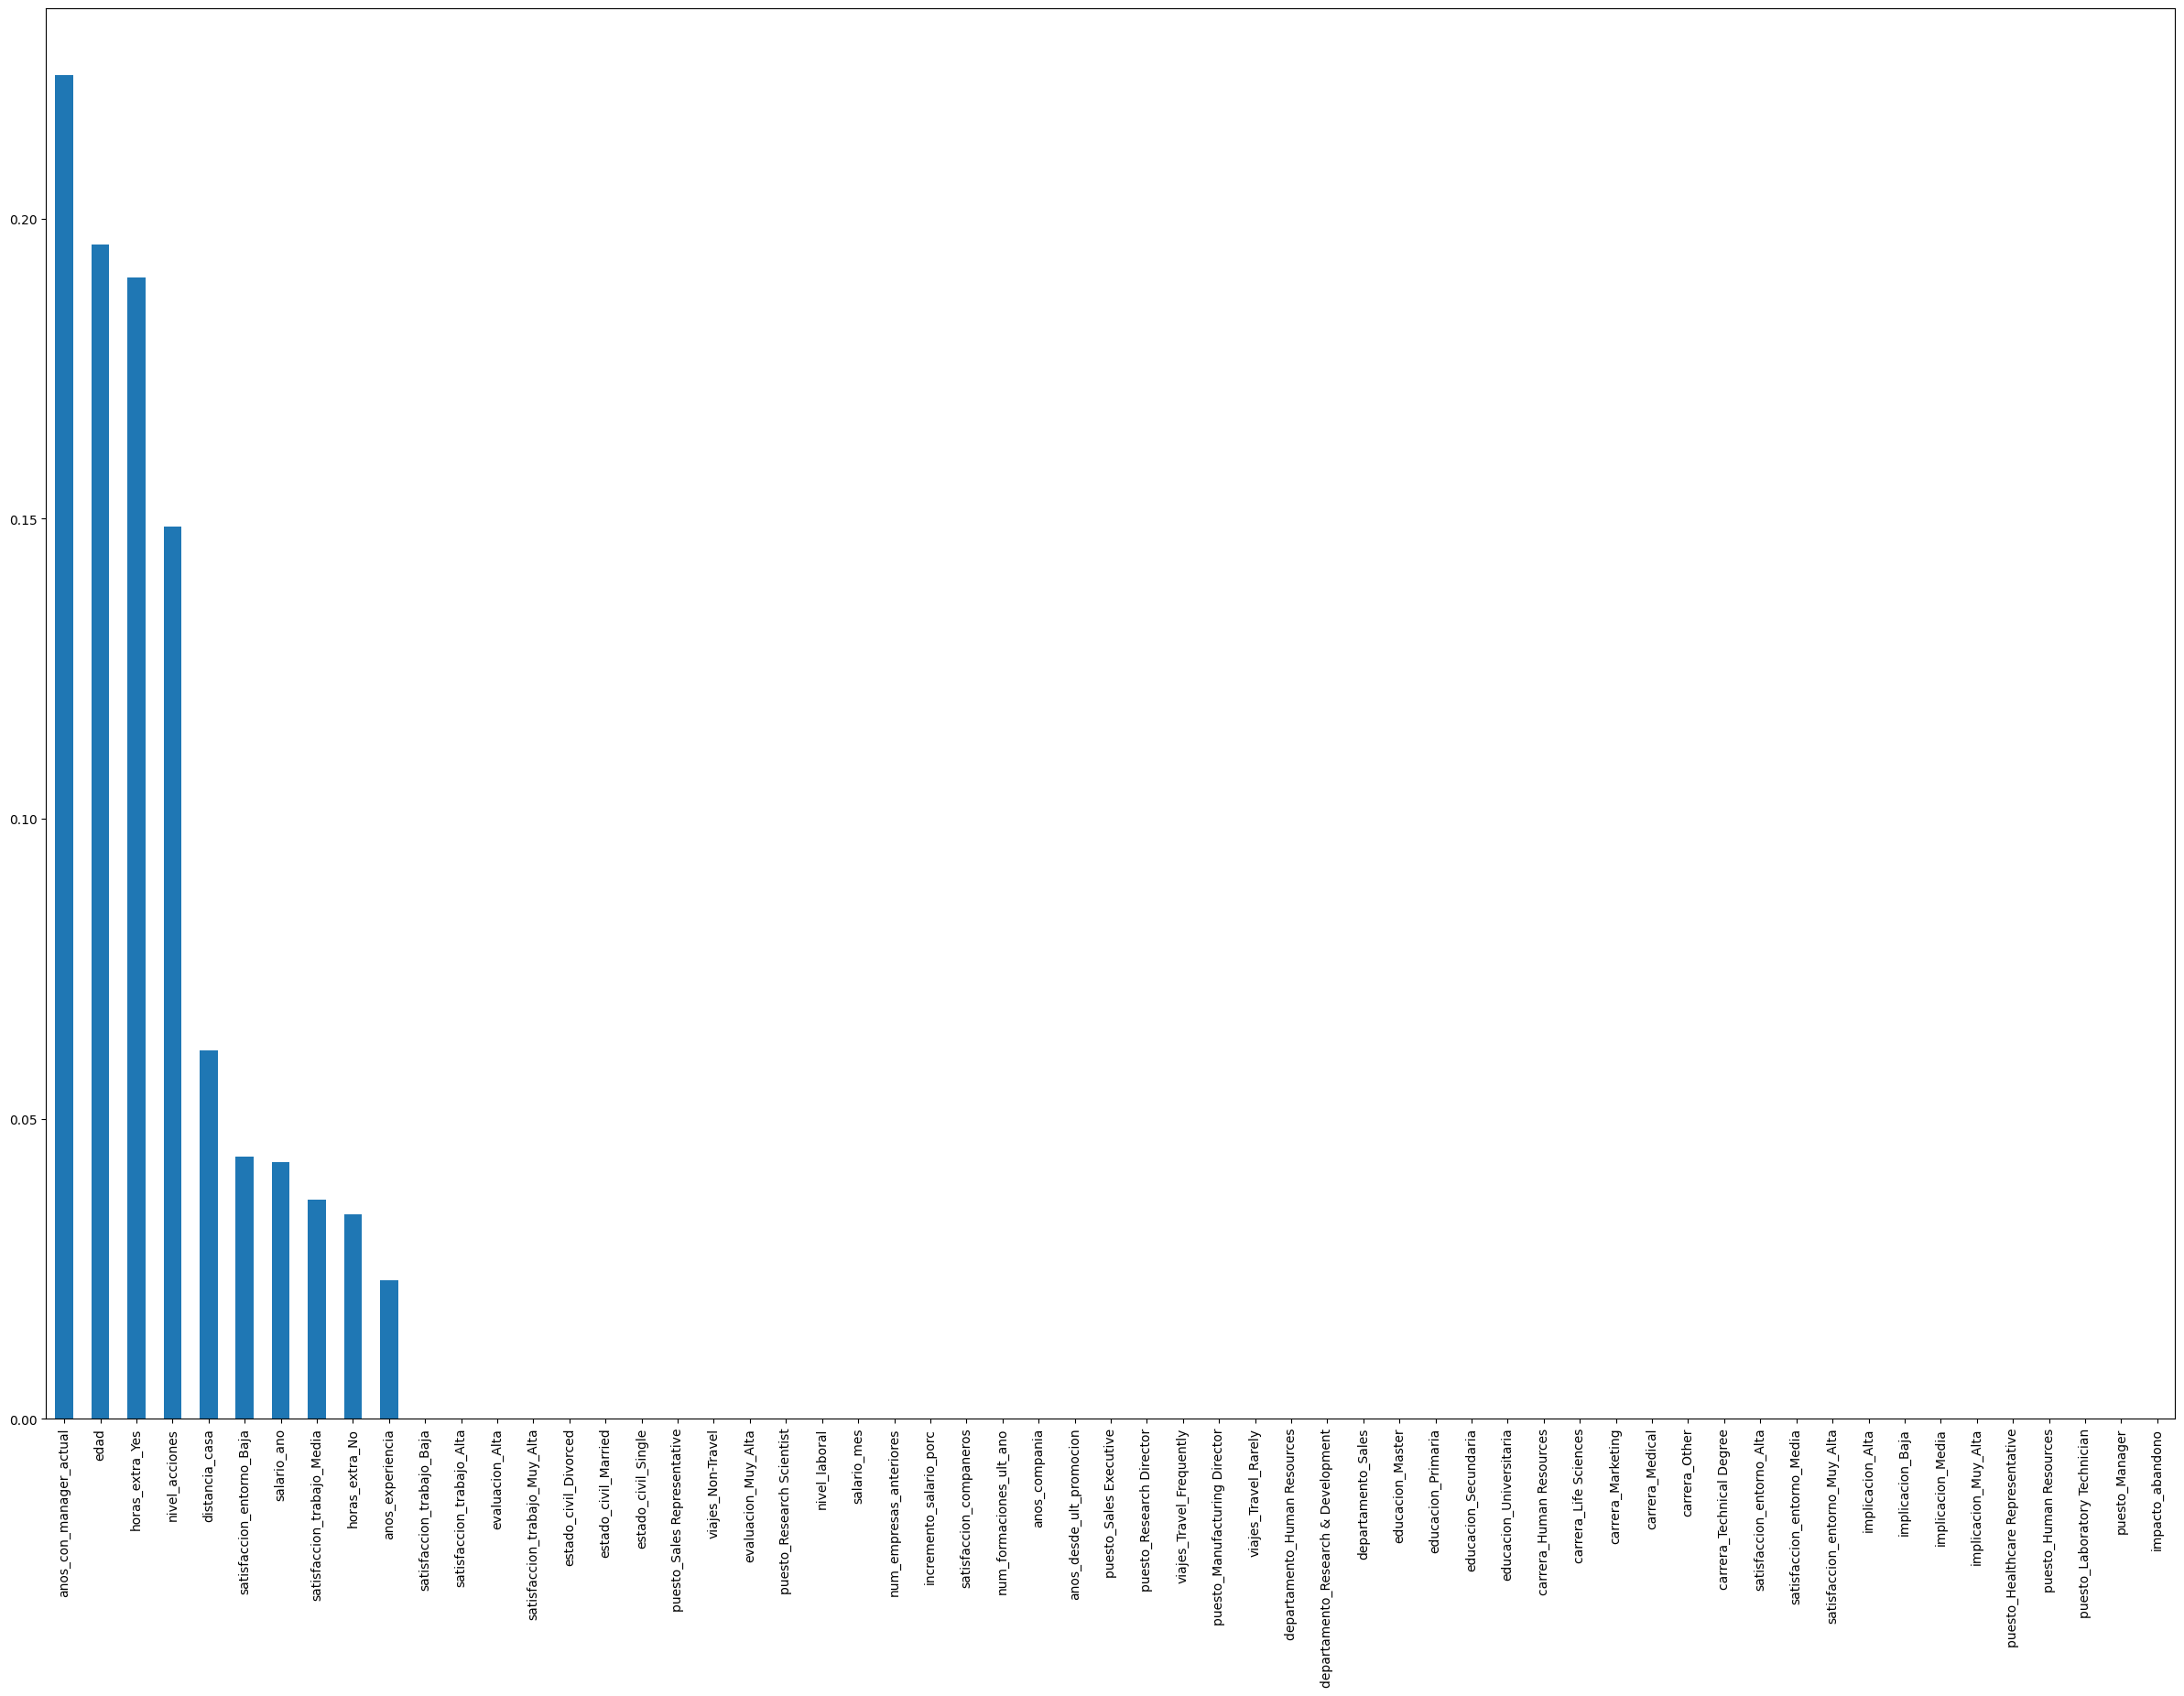

In [ ]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### **EXPLOTACIÓN.**

Incoporación del scoring al dataframe principal.

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,2,0,8,0,6,0,5,71916,14670.864,0.209302
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,5,1,10,3,10,1,7,61560,12558.240,0.045576
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,3,0,7,3,0,0,0,25080,4037.880,0.352941
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,4,0,8,3,8,3,0,34908,6876.876,0.352941
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,5,1,6,3,2,2,2,41616,8198.352,0.045576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,4,1,17,3,5,0,3,30852,6077.844,0.045576
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,2,1,9,5,7,1,7,119892,25177.320,0.045576
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,3,1,6,0,6,0,3,73704,15035.616,0.100719


**Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa.**

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,5,0,1,4,1,1,0,13416,2159.976,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,5,1,40,3,40,15,6,123744,25986.240,1.0
45,24,1,Travel_Rarely,Research & Development,1,Universitaria,Medical,Media,Alta,1,...,2,1,6,2,2,2,0,27516,4430.076,1.0
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,Alta,1,...,4,0,0,2,0,0,0,18828,3031.308,1.0
1016,20,1,Travel_Rarely,Research & Development,11,Secundaria,Medical,Muy_Alta,Media,1,...,2,0,1,2,1,0,0,31200,6146.400,1.0
1053,26,1,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Baja,Alta,1,...,3,1,6,2,3,1,2,24504,3945.144,1.0
1878,22,1,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,2,0,1,2,1,0,0,29664,4775.904,1.0
137,20,1,Travel_Frequently,Research & Development,6,Secundaria,Life Sciences,Muy_Alta,Media,1,...,3,0,1,5,1,1,0,35112,6917.064,1.0
881,35,1,Travel_Frequently,Research & Development,25,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,2,1,10,3,10,7,8,24264,3906.504,1.0


**Riesgo de dejar la empresa por puesto de trabajo.**

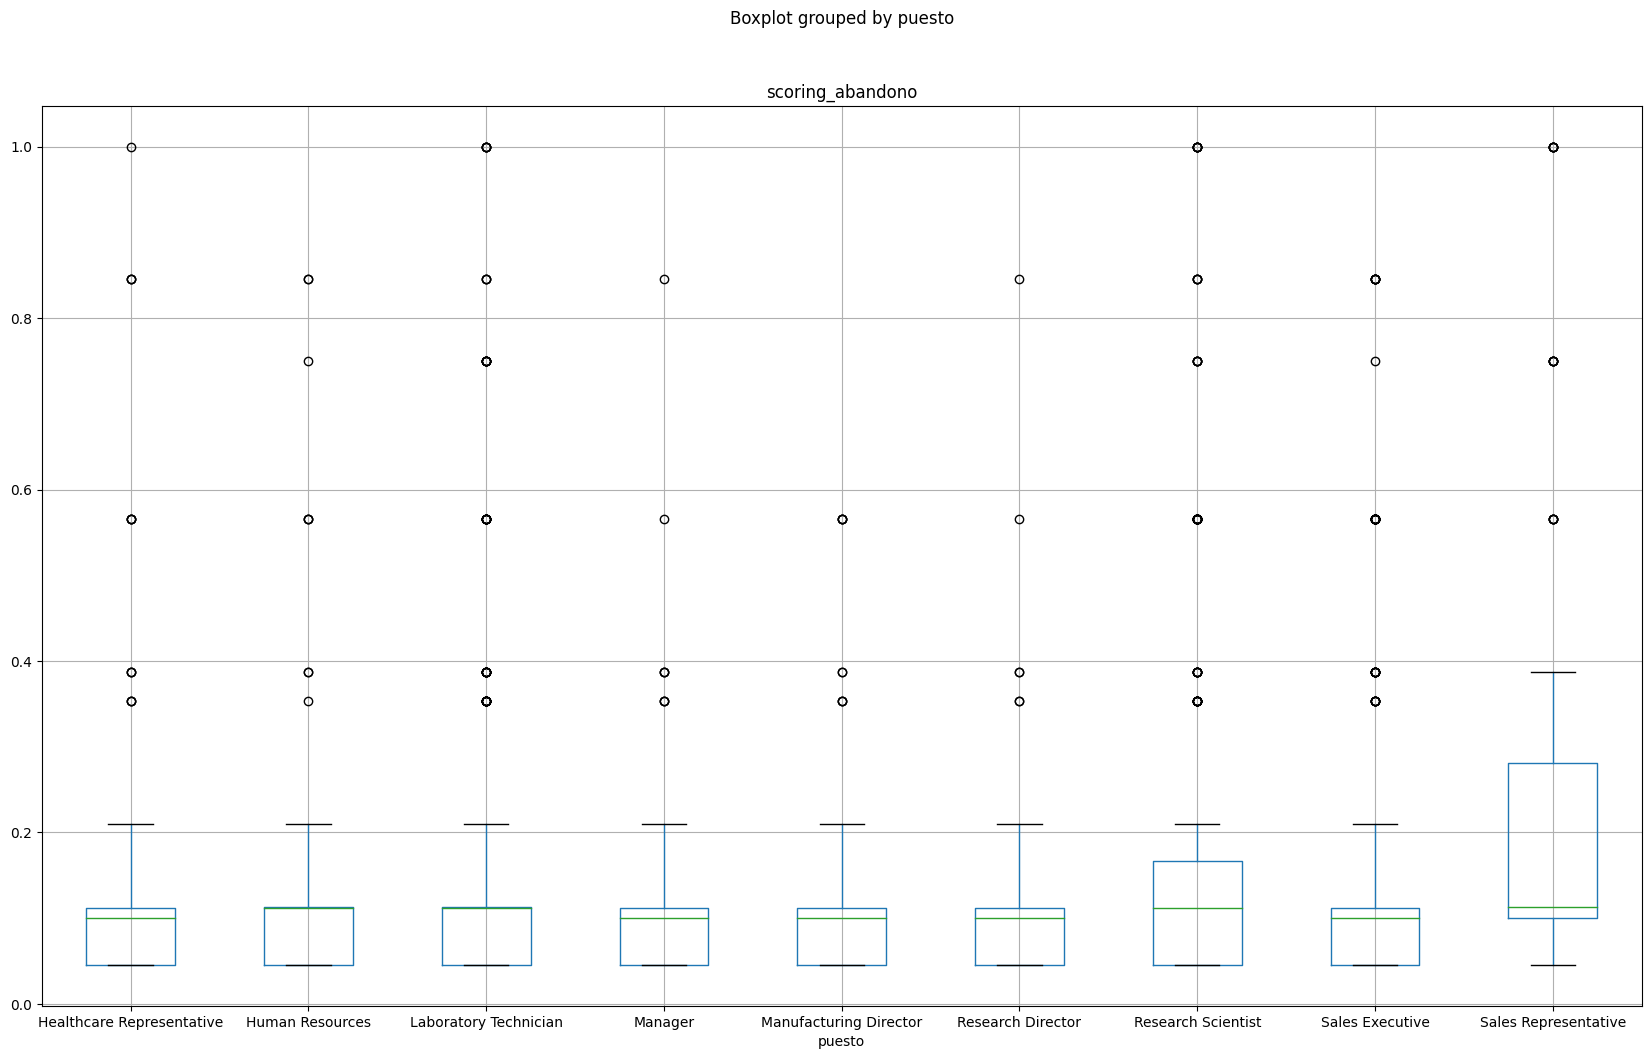

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### **RESULTADO.**

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,2,0,8,0,6,0,5,71916,14670.864,0.209302
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,5,1,10,3,10,1,7,61560,12558.240,0.045576
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,3,0,7,3,0,0,0,25080,4037.880,0.352941
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,4,0,8,3,8,3,0,34908,6876.876,0.352941
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,5,1,6,3,2,2,2,41616,8198.352,0.045576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,4,1,17,3,5,0,3,30852,6077.844,0.045576
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,2,1,9,5,7,1,7,119892,25177.320,0.045576
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,3,1,6,0,6,0,3,73704,15035.616,0.100719


Prueba Chi-cuadrado para Variables Categóricas

Teniendo visualizaciones bases en este notebook también es necesario demostrar o explorar otras posibilidades para comprender mejor los datos, respaldar hipótesis y obtener conclusiones más sólidas, proporcionaré ejemplos de gráficos y análisis estadísticos adicionales, así como sugerencias para el modelado predictivo:

In [ ]:
# Muestra la estructura del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['abandono'], df['satisfaccion_companeros'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f'Valor Chi-cuadrado: {chi2}, Valor p: {p}')


Valor Chi-cuadrado: 5.241067859713708, Valor p: 0.15497244371052626


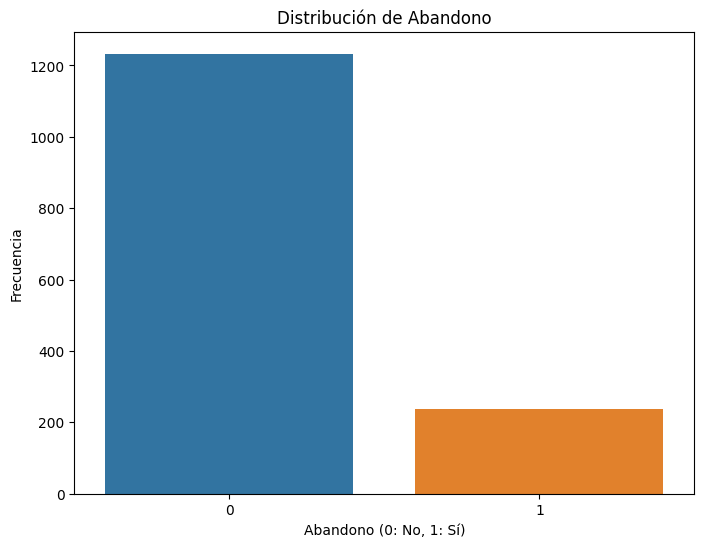

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='abandono', data=df)
plt.xlabel('Abandono (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Abandono')
plt.show()


In [ ]:
import pandas as pd

# Ajusta la ruta de acceso a tu archivo CSV en Google Drive
file_path = '/content/drive/My Drive/AbandonoEmpleados.csv'

# Carga los datos en un DataFrame
df = pd.read_csv(file_path, delimiter=';')


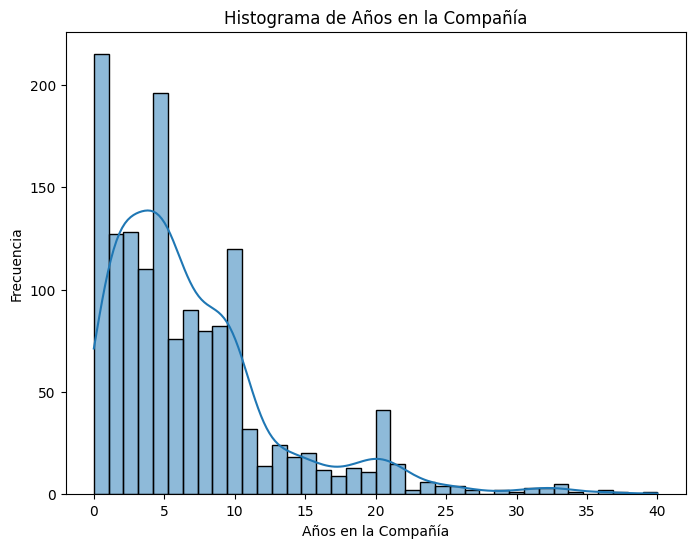

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['anos_compania'], kde=True)
plt.xlabel('Años en la Compañía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años en la Compañía')
plt.show()

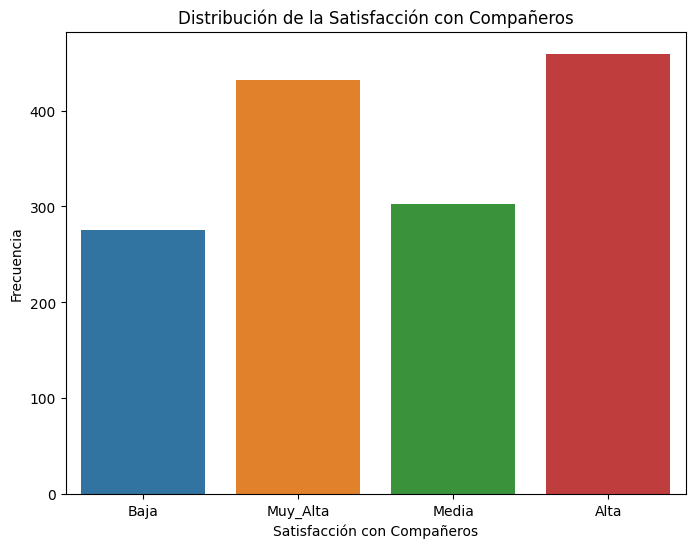

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaccion_companeros', data=df)
plt.xlabel('Satisfacción con Compañeros')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Satisfacción con Compañeros')
plt.show()


In [ ]:
anos_compania_summary = df['anos_compania'].describe()
print(anos_compania_summary)


count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: anos_compania, dtype: float64


In [ ]:
satisfaccion_companeros_summary = df['satisfaccion_companeros'].describe()
print(satisfaccion_companeros_summary)


count     1470
unique       4
top       Alta
freq       459
Name: satisfaccion_companeros, dtype: object


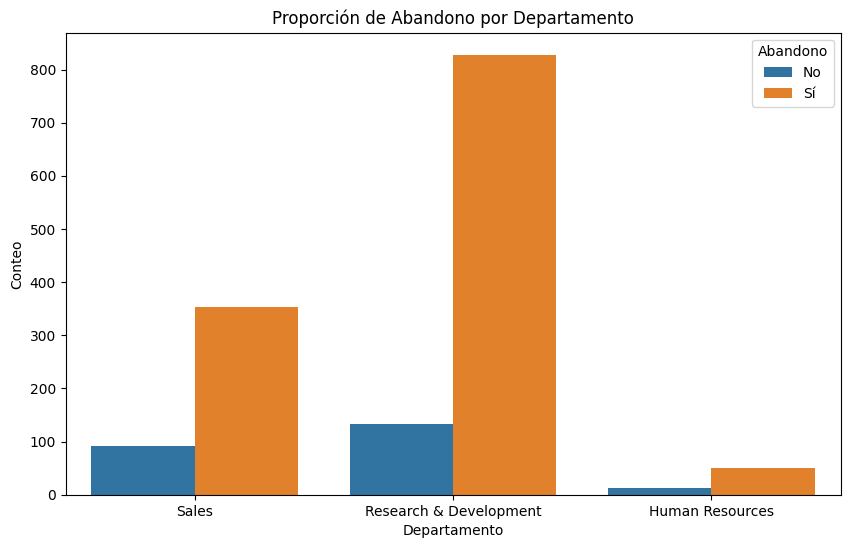

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='departamento', hue='abandono', data=df)
plt.xlabel('Departamento')
plt.ylabel('Conteo')
plt.title('Proporción de Abandono por Departamento')
plt.legend(title='Abandono', labels=['No', 'Sí'])
plt.show()


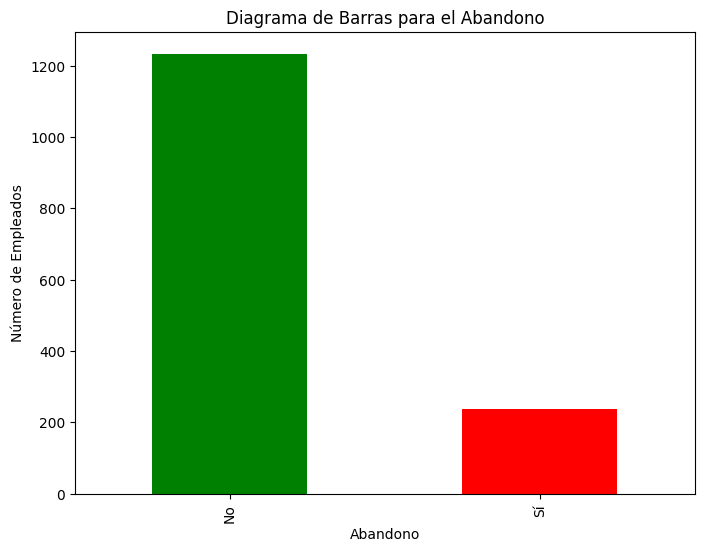

In [ ]:
import matplotlib.pyplot as plt

# Diagrama de barras para el abandono
plt.figure(figsize=(8, 6))
df['abandono'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Diagrama de Barras para el Abandono')
plt.xlabel('Abandono')
plt.ylabel('Número de Empleados')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


In [ ]:
from scipy import stats

abandonaron = df[df['abandono'] == 1]['satisfaccion_trabajo']
no_abandonaron = df[df['abandono'] == 0]['satisfaccion_trabajo']

t_stat, p_value = stats.ttest_ind(abandonaron, no_abandonaron)
print(f'Valor t: {t_stat}, Valor p: {p_value}')


Valor t: nan, Valor p: nan


In [ ]:
contingency_table = pd.crosstab(df['departamento'], df['abandono'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f'Estadístico Chi-cuadrado: {chi2}, Valor p: {p}')

Estadístico Chi-cuadrado: 10.79600732241067, Valor p: 0.004525606574479633


In [ ]:
print(df['satisfaccion_trabajo'].isnull().sum())



0


In [ ]:
t_stat, p_value = stats.ttest_ind(abandonaron, no_abandonaron, equal_var=False)



In [ ]:
# Verifica si hay valores faltantes en la columna 'satisfaccion_trabajo'
print(df['satisfaccion_trabajo'].isnull().sum())

# Si hay valores faltantes, puedes eliminar las filas con faltantes o imputar valores, por ejemplo:
# df = df.dropna(subset=['satisfaccion_trabajo'])


0


<ipython-input-82-5a26c822453a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



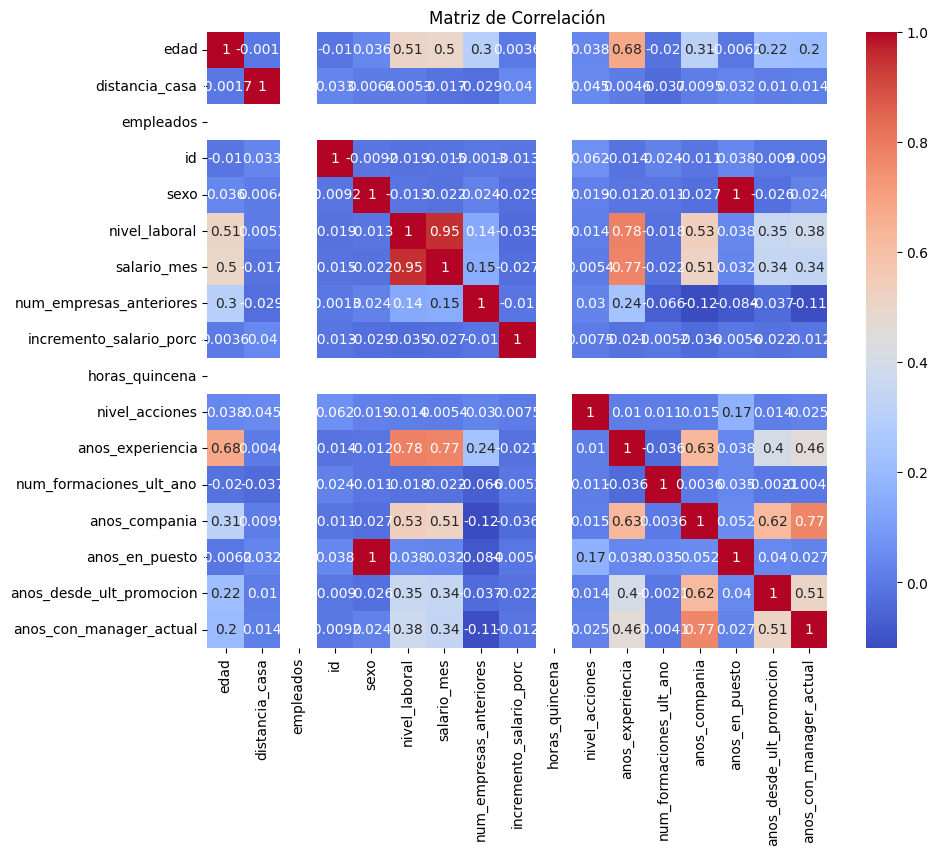

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciona las características y la variable objetivo
X = df[['edad', 'nivel_laboral', 'salario_mes']]  # Añade más características relevantes
y = df['abandono']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Exactitud del modelo: {accuracy}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(classification_rep)


Exactitud del modelo: 0.8673469387755102
Matriz de Confusión:
[[255   0]
 [ 39   0]]
Informe de Clasificación:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Crea y entrena el modelo de regresión logística con datos codificados
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones y evalúa el modelo
y_pred = model.predict(X_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de clasificación:\n", classification_report(y_test, y_pred))


Exactitud del modelo: 0.8673469387755102
Matriz de confusión:
 [[255   0]
 [ 39   0]]
Informe de clasificación:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(df['viajes'].isnull().sum())


0


In [ ]:
# Muestra la estructura del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   id                        1470 non-null   int64  
 9   satisfaccion_entorno      1470 non-null   object 
 10  sexo                      1271 non-null   float64
 11  implicacion               1470 non-null   object 
 12  nivel_laboral             1470 non-null   int64  
 13  puesto                    1470 non-null   object 
 14  satisfac

Diagrama de Barras para el Abandono

Visualización de Correlación

Prueba Chi-cuadrado para Variables Categóricas

Modelado Predictivo

El modelo de regresión logística que entrenaste muestra una exactitud del 86.73%. Sin embargo, al observar la matriz de confusión y el informe de clasificación, parece que el modelo está teniendo dificultades para predecir la clase "Yes" (abandono), ya que no ha realizado ninguna predicción positiva para esta clase. Esto indica un desequilibrio en tus datos de entrenamiento.

Dado que los datos de abandono están desequilibrados, el modelo tiende a predecir la clase mayoritaria, que en este caso es "No". Esto resulta en una alta exactitud en la clase "No" pero una baja precisión y recall para la clase "Yes".

Para abordar este desequilibrio de clases, puedes considerar las siguientes acciones:

Balancear los Datos: Aumentar la cantidad de datos en la clase minoritaria (en este caso, "Yes") o reducir la cantidad de datos en la clase mayoritaria. Puedes hacerlo mediante técnicas de sobremuestreo o submuestreo.

Cambiar la Métrica de Evaluación: En lugar de utilizar la exactitud, puedes usar métricas como la precisión, el recall o el área bajo la curva ROC (AUC) que son más adecuadas para problemas de desequilibrio de clases.

Experimentar con Parámetros del Modelo: Puedes ajustar los hiperparámetros del modelo de regresión logística, como el umbral de decisión, para lograr un mejor equilibrio entre precisión y recall.

Explorar Otros Modelos: Además de la regresión logística, considera probar otros modelos de clasificación, como Random Forest, Support Vector Machines (SVM) o XGBoost, que podrían manejar mejor el desequilibrio de clases.

Finalmente, es importante recordar que el problema de desequilibrio de clases es común en la clasificación de abandono laboral y debe abordarse cuidadosamente para obtener resultados significativos. Si deseas realizar más ajustes o explorar otras métricas, no dudes en pedir más orientación.

Pruebas Estadísticas (ANOVA):

In [ ]:
from scipy.stats import f_oneway

# Filtrar datos para diferentes departamentos
departamento1 = df[df['departamento'] == 'Department1']['satisfaccion_trabajo']
departamento2 = df[df['departamento'] == 'Department2']['satisfaccion_trabajo']
departamento3 = df[df['departamento'] == 'Department3']['satisfaccion_trabajo']

# Realizar ANOVA
f_statistic, p_value = f_oneway(departamento1, departamento2, departamento3)

# Imprimir resultados
print(f'Valor F: {f_statistic}, Valor p: {p_value}')


Valor F: nan, Valor p: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning:

at least one input has length 0



Prueba Chi-cuadrado para Variables Categóricas:

In [ ]:
from scipy import stats

anova_result = stats.f_oneway(df['edad'][df['departamento'] == 'Sales'],
                               df['edad'][df['departamento'] == 'Research & Development'],
                               df['edad'][df['departamento'] == 'Human Resources'])
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)


Valor F: 0.7655031924976903
Valor p: 0.46528552999349515


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sexo'], df['abandono'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Valor Chi-cuadrado:", chi2)
print("Valor p:", p)


Valor Chi-cuadrado: 26.729303959810345
Valor p: 6.709037698658819e-06


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Selecciona características y etiquetas
X = df[['edad', 'empleados', 'salario_mes']]  # Selecciona las características que desees
y = df['abandono']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones y evalúa el modelo
predictions = model.predict(X_test)
# Aquí puedes evaluar el rendimiento del modelo (precisión, matriz de confusión, etc.).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciona las características y la variable objetivo
X = df[['edad', 'nivel_laboral', 'salario_mes']]  # Añade más características relevantes
y = df['abandono']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Exactitud del modelo: {accuracy}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(classification_rep)

Exactitud del modelo: 0.8673469387755102
Matriz de Confusión:
[[255   0]
 [ 39   0]]
Informe de Clasificación:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df = pd.get_dummies(df, columns=['empleados'], drop_first=True)


In [ ]:
df['abandono'] = df['abandono'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Precisión: {accuracy}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Reporte de Clasificación:')
print(classification_rep)


Precisión: 0.8673469387755102
Matriz de Confusión:
[[255   0]
 [ 39   0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Sobremuestreo de la clase minoritaria
over_sampler = RandomOverSampler()
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

# Submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler()
X_resampled, y_resampled = under_sampler.fit_resample(X, y)


In [ ]:
model = LogisticRegression(class_weight='balanced')


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Modelo de Regresión Logística
X_lr = df[['edad', 'salario_mes']]
y = df['abandono']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Modelo de Bosque Aleatorio
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Regresión Logística
lr_predictions = lr_model.predict(X_test)
lr_auc_roc = roc_auc_score(y_test, lr_predictions)
print("AUC-ROC para Regresión Logística:", lr_auc_roc)
lr_classification_report = classification_report(y_test, lr_predictions)
print("Informe de Clasificación para Regresión Logística:\n", lr_classification_report)

# Bosque Aleatorio
rf_predictions = rf_model.predict(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)
print("AUC-ROC para Bosque Aleatorio:", rf_auc_roc)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Informe de Clasificación para Bosque Aleatorio:\n", rf_classification_report)

# Paso 7: Validación Cruzada

cv = StratifiedKFold(n_splits=5)  # Validación cruzada estratificada
lr_cross_val = cross_val_score(lr_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Regresión Logística en Validación Cruzada:", np.mean(lr_cross_val))
rf_cross_val = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada:", np.mean(rf_cross_val))


AUC-ROC para Regresión Logística: 0.5
Informe de Clasificación para Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

AUC-ROC para Bosque Aleatorio: 0.5327300150829563
Informe de Clasificación para Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       255
           1       0.24      0.13      0.17        39

    accuracy                           0.83       294
   macro avg       0.56      0.53      0.54       294
weighted avg       0.79      0.83      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC-ROC Promedio para Regresión Logística en Validación Cruzada: 0.6577824308585922
AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada: 0.6488884123755959


Dado que los resultados actuales no son muy buenos, aquí hay algunas recomendaciones:

Ingeniería de Características:

In [ ]:
# Ejemplo de ingeniería de características
df['incremento'] = df['incremento_salario_porc'] * 2


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Crear un modelo de regresión logística
lr_model = LogisticRegression()

# Realizar una búsqueda de hiperparámetros
grid_search = GridSearchCV(lr_model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_resampled, y_resampled)

# Ver los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Crear modelos
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
svc_model = SVC()

# Entrenar modelos
rf_model.fit(X_resampled, y_resampled)
gb_model.fit(X_resampled, y_resampled)
svc_model.fit(X_resampled, y_resampled)


SVC()

In [ ]:
print(svc_model)


SVC()


In [ ]:
print("Valor de C en el modelo SVC:", svc_model.C)


Valor de C en el modelo SVC: 1.0


Para aplicar estas recomendaciones en el código Python utilizando el DataFrame con el que has estado trabajando, puedes seguir estos pasos:

In [ ]:
# Balanceo de Clases:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al DataFrame
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Especifica el número de características a seleccionar (ajusta según tus necesidades)
k = 2

# Crea una instancia de SelectKBest con la prueba F como métrica
selector = SelectKBest(score_func=f_classif, k=k)

# Aplica la selección de características al conjunto de datos
X_new = selector.fit_transform(X_resampled, y_resampled)




In [ ]:
k = 'all'  #
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_resampled, y_resampled)

In [ ]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al DataFrame
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)
best_C = grid_search.best_params_['C']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Crear modelos
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Entrenar modelos
rf_model.fit(X_resampled, y_resampled)
gb_model.fit(X_resampled, y_resampled)


GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve

# AUC-ROC
y_pred = grid_search.predict(X_resampled)
roc_auc = roc_auc_score(y_resampled, y_pred)

# AUC-PR
precision, recall, _ = precision_recall_curve(y_resampled, y_pred)
pr_auc = auc(recall, precision)


In [ ]:
# Muestra las primeras filas del DataFrame para inspeccionar los nombres de las columnas
print(df.head())


   edad  abandono             viajes            departamento  distancia_casa  \
0    41         1      Travel_Rarely                   Sales               1   
1    49         0  Travel_Frequently  Research & Development               8   
2    37         1      Travel_Rarely  Research & Development               2   
3    33         0  Travel_Frequently  Research & Development               3   
4    27         0      Travel_Rarely  Research & Development               2   

       educacion        carrera  id satisfaccion_entorno  sexo  ...  \
0  Universitaria  Life Sciences   1                Media   3.0  ...   
1     Secundaria  Life Sciences   2                 Alta   2.0  ...   
2     Secundaria          Other   4             Muy_Alta   2.0  ...   
3  Universitaria  Life Sciences   5             Muy_Alta   3.0  ...   
4  Universitaria        Medical   7                 Baja   3.0  ...   

  horas_quincena  nivel_acciones anos_experiencia num_formaciones_ult_ano  \
0             8

In [ ]:
import pandas as pd

# Carga el archivo CSV con punto y coma como delimitador
data = pd.read_csv('AbandonoEmpleados.csv', delimiter=';')

# Muestra las primeras filas del DataFrame para inspeccionar los nombres de las columnas
print(data.head())


   edad abandono             viajes            departamento  distancia_casa  \
0    41      Yes      Travel_Rarely                   Sales               1   
1    49       No  Travel_Frequently  Research & Development               8   
2    37      Yes      Travel_Rarely  Research & Development               2   
3    33       No  Travel_Frequently  Research & Development               3   
4    27       No      Travel_Rarely  Research & Development               2   

       educacion        carrera  empleados  id satisfaccion_entorno  ...  \
0  Universitaria  Life Sciences          1   1                Media  ...   
1     Secundaria  Life Sciences          1   2                 Alta  ...   
2     Secundaria          Other          1   4             Muy_Alta  ...   
3  Universitaria  Life Sciences          1   5             Muy_Alta  ...   
4  Universitaria        Medical          1   7                 Baja  ...   

   satisfaccion_companeros horas_quincena  nivel_acciones anos_exper

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos
data = pd.read_csv('AbandonoEmpleados.csv', delimiter=';')

# Tratar con valores nulos (si es necesario)
data = data.dropna()

# Codificar variables categóricas
label_encoder = LabelEncoder()
data['abandono'] = label_encoder.fit_transform(data['abandono'])

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data.drop('abandono', axis=1)
y = data['abandono']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos
data = pd.read_csv('AbandonoEmpleados.csv', delimiter=';')

# Tratar con valores nulos (si es necesario)
data = data.dropna()

# Codificar variables categóricas
label_encoder = LabelEncoder()
data['abandono'] = label_encoder.fit_transform(data['abandono'])

# Codificar las variables categóricas con one-hot encoding
data = pd.get_dummies(data, columns=['viajes', 'departamento', 'educacion', 'carrera', 'sexo', 'implicacion', 'nivel_laboral', 'puesto', 'estado_civil', 'conciliacion'], drop_first=True)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data.drop('abandono', axis=1)
y = data['abandono']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
print(data.columns)


Index(['edad', 'abandono', 'distancia_casa', 'empleados', 'id',
       'satisfaccion_entorno', 'satisfaccion_trabajo', 'salario_mes',
       'num_empresas_anteriores', 'mayor_edad', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'horas_quincena', 'nivel_acciones', 'anos_experiencia',
       'num_formaciones_ult_ano', 'anos_compania', 'anos_en_puesto',
       'anos_desde_ult_promocion', 'anos_con_manager_actual',
       'viajes_Travel_Frequently', 'viajes_Travel_Rarely',
       'departamento_Research & Development', 'departamento_Sales',
       'educacion_Master', 'educacion_Primaria', 'educacion_Secundaria',
       'educacion_Universitaria', 'carrera_Life Sciences', 'carrera_Marketing',
       'carrera_Medical', 'carrera_Other', 'carrera_Technical Degree',
       'sexo_2.0', 'sexo_3.0', 'sexo_4.0', 'implicacion_Baja',
       'implicacion_Media', 'implicacion_Muy_Alta', 'nivel_laboral_2',
       'nivel_laboral_3', 'nivel_laboral_4', 'niv

In [ ]:
import pandas as pd

# Carga el archivo CSV con punto y coma como delimitador
data = pd.read_csv('AbandonoEmpleados.csv', delimiter=';')

# Muestra las primeras filas del DataFrame para inspeccionar los nombres de las columnas
print(data.head())


   edad abandono             viajes            departamento  distancia_casa  \
0    41      Yes      Travel_Rarely                   Sales               1   
1    49       No  Travel_Frequently  Research & Development               8   
2    37      Yes      Travel_Rarely  Research & Development               2   
3    33       No  Travel_Frequently  Research & Development               3   
4    27       No      Travel_Rarely  Research & Development               2   

       educacion        carrera  empleados  id satisfaccion_entorno  ...  \
0  Universitaria  Life Sciences          1   1                Media  ...   
1     Secundaria  Life Sciences          1   2                 Alta  ...   
2     Secundaria          Other          1   4             Muy_Alta  ...   
3  Universitaria  Life Sciences          1   5             Muy_Alta  ...   
4  Universitaria        Medical          1   7                 Baja  ...   

   satisfaccion_companeros horas_quincena  nivel_acciones anos_exper

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE


In [ ]:
# Visualizar las primeras filas del DataFrame
print(data.head())

# Listar los nombres de las columnas
column_names = data.columns
print(column_names)

# Contar el número de columnas
num_columns = len(data.columns)
print("Número de columnas:", num_columns)


   edad abandono             viajes            departamento  distancia_casa  \
0    41      Yes      Travel_Rarely                   Sales               1   
1    49       No  Travel_Frequently  Research & Development               8   
2    37      Yes      Travel_Rarely  Research & Development               2   
3    33       No  Travel_Frequently  Research & Development               3   
4    27       No      Travel_Rarely  Research & Development               2   

       educacion        carrera  empleados  id satisfaccion_entorno  ...  \
0  Universitaria  Life Sciences          1   1                Media  ...   
1     Secundaria  Life Sciences          1   2                 Alta  ...   
2     Secundaria          Other          1   4             Muy_Alta  ...   
3  Universitaria  Life Sciences          1   5             Muy_Alta  ...   
4  Universitaria        Medical          1   7                 Baja  ...   

   satisfaccion_companeros horas_quincena  nivel_acciones anos_exper

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=42)


In [ ]:
X = data.drop('abandono', axis=1)  # Excluimos la columna 'abandono'
y = data['abandono']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Identificar características categóricas
categorical_cols = ['viajes', 'departamento', 'educacion', 'carrera', 'sexo', 'nivel_laboral', 'puesto', 'estado_civil', 'conciliacion']

# Codificar características categóricas
X_encoded = pd.get_dummies(X_train, columns=categorical_cols)


In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv('AbandonoEmpleados.csv', delimiter=';')

# Tratar con valores nulos (si es necesario)
data = data.dropna()  # Elimina filas con valores nulos

# Crear una instancia de LabelEncoder para manejar variables categóricas
label_encoder = LabelEncoder()

# Iterar a través de las columnas y aplicar LabelEncoder a las columnas categóricas
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = data.drop('abandono', axis=1)  # Excluye la columna 'abandono'
y = data['abandono']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Definir el rango de valores de C para la búsqueda de hiperparámetros
param_grid = {'C': [0.1, 1, 10]}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='roc_auc')

# Ajustar el modelo a los datos balanceados
grid_search.fit(X_resampled, y_resampled)

# Obtener el mejor valor de C
best_C = grid_search.best_params_['C']


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [ ]:
# Selecciona características y etiquetas
X = df[['edad', 'salario_mes']]
y = df['abandono']

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de Regresión Logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Selección de características para el modelo de regresión logística
X_lr = df[['edad', 'salario_mes']]

# Selección de características para el modelo de Bosque Aleatorio
X_rf = df[['distancia_casa', 'educacion', 'anos_experiencia']]


In [ ]:
# Supongamos que has cargado tu conjunto de datos en un DataFrame llamado 'data'

print(data.head())  # Para verificar cómo se ven tus datos


    edad  abandono  viajes  departamento  distancia_casa  educacion  carrera  \
2     37         1       2             1               2          3        4   
3     33         0       1             1               3          4        1   
11    29         0       2             1              15          3        1   
12    31         0       2             1              26          4        1   
21    36         1       2             2               9          3        1   

    empleados  id  satisfaccion_entorno  ...  satisfaccion_companeros  \
2           1   4                     3  ...                        2   
3           1   5                     3  ...                        0   
11          1  15                     3  ...                        3   
12          1  16                     1  ...                        3   
21          1  27                     0  ...                        2   

    horas_quincena  nivel_acciones  anos_experiencia  num_formaciones_ult_ano  \

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=42)


In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE

# Crea una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplica SMOTE al conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE

# Crea una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplica SMOTE al conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
import collections

class_counts = collections.Counter(y_resampled)
print("Conteo de clases:", class_counts)


Conteo de clases: Counter({0: 978, 1: 978})


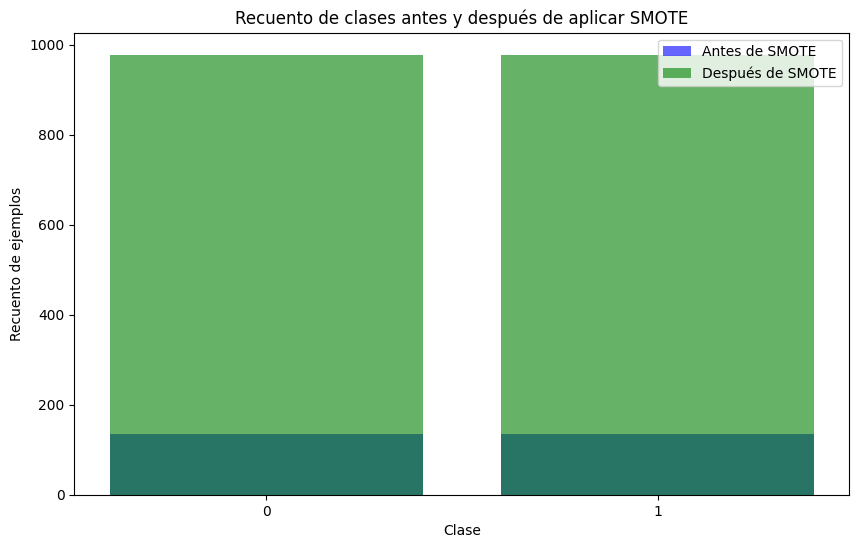

In [ ]:
import matplotlib.pyplot as plt

# Recuento de clases antes de aplicar SMOTE
classes_before_smote = [0, 1]  # Clases 0 y 1
counts_before_smote = [134, 134]  # Recuento de ejemplos de cada clase antes de SMOTE

# Recuento de clases después de aplicar SMOTE
classes_after_smote = [0, 1]  # Clases 0 y 1
counts_after_smote = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(classes_before_smote, counts_before_smote, color='b', alpha=0.6, label='Antes de SMOTE')
plt.bar(classes_after_smote, counts_after_smote, color='g', alpha=0.6, label='Después de SMOTE')
plt.xlabel('Clase')
plt.ylabel('Recuento de ejemplos')
plt.xticks(classes_before_smote)
plt.legend()
plt.title('Recuento de clases antes y después de aplicar SMOTE')
plt.show()


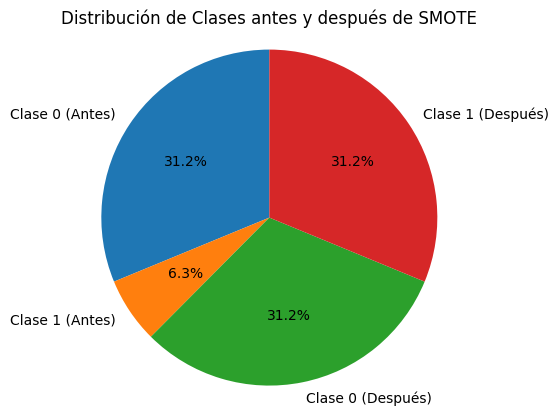

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos de entrenamiento X_train y y_train
# Aplica SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Calcula el recuento de clases antes y después de SMOTE
class_counts_before = Counter(y_train)
class_counts_after = Counter(y_resampled)

# Gráfico de pastel
sizes = [class_counts_before[0], class_counts_before[1], class_counts_after[0], class_counts_after[1]]
labels = ['Clase 0 (Antes)', 'Clase 1 (Antes)', 'Clase 0 (Después)', 'Clase 1 (Después)']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Clases antes y después de SMOTE')
plt.show()


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Conteo de clases antes de SMOTE
counter_before = Counter(y_train)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Conteo de clases después de SMOTE
counter_after = Counter(y_resampled)

print("Conteo de clases antes de SMOTE:", counter_before)
print("Conteo de clases después de SMOTE:", counter_after)


Conteo de clases antes de SMOTE: Counter({0: 978, 1: 198})
Conteo de clases después de SMOTE: Counter({0: 978, 1: 978})


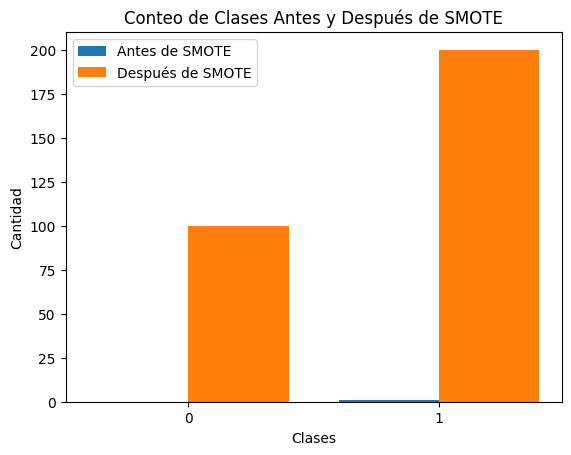

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'before_smote' y 'after_smote' son listas de etiquetas de clase antes y después de SMOTE.
before_smote = [0, 1]  # Ejemplo de recuento de clases antes de SMOTE
after_smote = [100, 200]  # Ejemplo de recuento de clases después de SMOTE

labels = ['Antes de SMOTE', 'Después de SMOTE']

x = range(len(labels))

plt.bar(x, before_smote, width=0.4, label='Antes de SMOTE')
plt.bar([i + 0.4 for i in x], after_smote, width=0.4, label='Después de SMOTE')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.xticks([i + 0.2 for i in x], [0, 1])
plt.legend()
plt.title('Conteo de Clases Antes y Después de SMOTE')
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores de C para la búsqueda de hiperparámetros
param_grid = {'C': [0.1, 1, 10]}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='roc_auc')

# Ajustar el modelo a los datos balanceados
grid_search.fit(X_resampled, y_resampled)

# Obtener el mejor valor de C
best_C = grid_search.best_params_['C']


resultado de auc-roc ??**

In [ ]:
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve

# AUC-ROC
y_pred = grid_search.predict(X_resampled)
roc_auc = roc_auc_score(y_resampled, y_pred)

# AUC-PR
precision, recall, _ = precision_recall_curve(y_resampled, y_pred)
pr_auc = auc(recall, precision)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Crear un modelo de regresión logística
lr_model = LogisticRegression()

# Realizar una búsqueda de hiperparámetros
grid_search = GridSearchCV(lr_model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_resampled, y_resampled)

# Ver los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Paso 1: Obtener más datos (si es posible)

# Paso 2: Cargar tus datos
# Asumiendo que ya has cargado tus datos en el DataFrame df.

# Paso 3: Selección de Características e Ingeniería de Características
# Evalúa y selecciona características relevantes aquí

# Paso 4: Prueba otros modelos

# Modelo de Regresión Logística
X = df[['edad', 'salario_mes']]
y = df['abandono']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Modelo de Bosque Aleatorio
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Paso 5: Ajuste de Hiperparámetros
# Puedes ajustar los hiperparámetros de los modelos aquí

# Paso 6: Métricas de Evaluación

# Regresión Logística
lr_predictions = lr_model.predict(X_test)
lr_auc_roc = roc_auc_score(y_test, lr_predictions)
print("AUC-ROC para Regresión Logística:", lr_auc_roc)
lr_classification_report = classification_report(y_test, lr_predictions)
print("Informe de Clasificación para Regresión Logística:\n", lr_classification_report)

# Bosque Aleatorio
rf_predictions = rf_model.predict(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)
print("AUC-ROC para Bosque Aleatorio:", rf_auc_roc)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Informe de Clasificación para Bosque Aleatorio:\n", rf_classification_report)

# Paso 7: Validación Cruzada

cv = StratifiedKFold(n_splits=5)  # Validación cruzada estratificada
lr_cross_val = cross_val_score(lr_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Regresión Logística en Validación Cruzada:", np.mean(lr_cross_val))
rf_cross_val = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada:", np.mean(rf_cross_val))


AUC-ROC para Regresión Logística: 0.5
Informe de Clasificación para Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

AUC-ROC para Bosque Aleatorio: 0.5435897435897435
Informe de Clasificación para Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.26      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.57      0.54      0.55       294
weighted avg       0.80      0.83      0.81       294

AUC-ROC Promedio para Regresión Logística en Validación Cruzada: 0.6577652028458435


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada: 0.628613067937898


In [ ]:
# Verificar si la columna 'empleados' existe en el DataFrame
if 'empleados' in df.columns:
    print("La columna 'empleados' existe en el DataFrame.")
else:
    print("La columna 'empleados' no existe en el DataFrame.")

# Mostrar la lista de todas las columnas en el DataFrame
print("Lista de columnas en el DataFrame:")
print(df.columns)


La columna 'empleados' no existe en el DataFrame.
Lista de columnas en el DataFrame:
Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'id', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual', 'incremento'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Paso 1: Obtener más datos (si es posible)

# Paso 2: Cargar tus datos
# ...

# Paso 3: Selección de Características e Ingeniería de Características
# Evalúa y selecciona características relevantes aquí

# Paso 4: Prueba otros modelos

# Modelo de Regresión Logística
X = df[['edad', 'salario_mes']]
y = df['abandono']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Modelo de Bosque Aleatorio
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Paso 5: Ajuste de Hiperparámetros

# Puedes ajustar los hiperparámetros de los modelos aquí

# Paso 6: Métricas de Evaluación

# Regresión Logística
lr_predictions = lr_model.predict(X_test)
lr_auc_roc = roc_auc_score(y_test, lr_predictions)
print("AUC-ROC para Regresión Logística:", lr_auc_roc)
lr_classification_report = classification_report(y_test, lr_predictions)
print("Informe de Clasificación para Regresión Logística:\n", lr_classification_report)

# Bosque Aleatorio
rf_predictions = rf_model.predict(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)
print("AUC-ROC para Bosque Aleatorio:", rf_auc_roc)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Informe de Clasificación para Bosque Aleatorio:\n", rf_classification_report)

# Paso 7: Validación Cruzada

cv = StratifiedKFold(n_splits=5)  # Validación cruzada estratificada
lr_cross_val = cross_val_score(lr_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Regresión Logística en Validación Cruzada:", np.mean(lr_cross_val))
rf_cross_val = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print("AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada:", np.mean(rf_cross_val))


AUC-ROC para Regresión Logística: 0.5
Informe de Clasificación para Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

AUC-ROC para Bosque Aleatorio: 0.553393665158371
Informe de Clasificación para Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       255
           1       0.33      0.15      0.21        39

    accuracy                           0.85       294
   macro avg       0.61      0.55      0.56       294
weighted avg       0.81      0.85      0.82       294

AUC-ROC Promedio para Regresión Logística en Validación Cruzada: 0.6577652028458435


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



AUC-ROC Promedio para Bosque Aleatorio en Validación Cruzada: 0.6292476958116554


In [ ]:
from sklearn.metrics import roc_auc_score

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)


AUC-ROC: 0.520814479638009


---